
# Analyse descriptive des données des annonces immobilères

potentielles sourdes de données complémentaires:
- scrapping d'autres sites d'annonces
- https://drive.google.com/file/d/12CPmCyuUvlXB266yXJckRywW04n4RZ4A/view)

Import librairies

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv
import re
import sys
import os
from tqdm import tqdm
import pickle
from collections import Counter


print(sys.executable)
os.getcwd()

/Users/sodagayethiam/opt/anaconda3/envs/env_propre/bin/python


'/Users/sodagayethiam/Documents/Formations/NLP/Projet_NLP/nlp_immo/notebooks'

Lecture des données

In [169]:
df_immo = pd.read_csv("../data/raw/annonces_aveccaracteristiques_preprocesse.csv") 
print(df_immo.columns)

df_immo.head()


Index(['ID', 'Titre', 'Prix', 'Localisation', 'Surface', 'Pièces', 'Chambres',
       'DPE', 'Description', 'Date de publication', 'Agence',
       'Logo de l'agence', 'Images', 'Lien annonce', 'Lien page source',
       'Caracteristiques'],
      dtype='object')


,ID,Titre,Prix,Localisation,Surface,Pièces,Chambres,DPE,Description,Date de publication,Agence,Logo de l'agence,Images,Lien annonce,Lien page source,Caracteristiques
0,xxuijv,Appartement • 77 m² • 4 pièces • 3 chambres,220000.0,Villeurbanne (69100),77.00,4.0,3.0,d,T4 Villeurbanne Perralière garage possible\nT4...,2025-02-10,Michelin Immobilier,https://photo.superimmo.com/tlios6iudr47eu9tji...,['https://photo.superimmo.com/tihja1py7xi9bri3...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 119 000 €; Prix au m² : 3 088 ...
1,xy1hq1,Maison • 145 m² • 5 pièces • 4 chambres • Ter....,725000.0,Dommartin (69380),145.00,5.0,4.0,c,"Dommartin , à deux pas du golf de la Tour de S...",2025-03-08,Côté Salvagny,https://photo.superimmo.com/cpmbbw8eo3stg5bugg...,['https://photo.superimmo.com/ijbfe9iddc0t92le...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 725 000 €; Prix au m² : 5 000 ...
2,xxysg8,Appartement • 101 m² • 5 pièces,380000.0,Saint-Genis-Laval (69230),101.00,5.0,NaN,c,"Exclusivité ECOTRANSAC,\nVenez découvrir ce ma...",2025-02-27,Ecotransac,https://photo.superimmo.com/fg9pr0jmll4gvdwono...,['https://photo.superimmo.com/z4jfbbhoqtn9ojs7...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 295 000 €; Prix au m² : 3 779 ...
3,xwmegh,Appartement • 63 m² • 3 pièces • 2 chambres,250000.0,Lyon 8ème (69008),63.00,3.0,2.0,d,*** OFFRE ACCEPTÉE ***\n69008 LYON - T3 DE 63 ...,2024-09-05,Emilie Ravassard - efficity,https://photo.superimmo.com/zgsep6twqzvtyzjxox...,['https://photo.superimmo.com/jipk9e1rayxvjxv7...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 270 000 €; Prix au m² : 4 005 ...
4,xx813q,"Appartement • 67,41 m² • 3 pièces • 2 chambres",270000.0,Lyon 3ème (69003),67.41,3.0,2.0,e,LIMMO vous propose à la vente cet appartement ...,2024-11-20,LIMMO,https://photo.superimmo.com/sr0zeb6hiuuqm1cluf...,['https://photo.superimmo.com/tdc1q8ffn0tzlg1p...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 155 000 €; Prix au m² : 5 000 ...


In [408]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

display(df_immo.head(2))

pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')


,ID,Titre,Prix,Localisation,Surface,Pièces,Chambres,DPE,Description,Date de publication,Agence,Logo de l'agence,Images,Lien annonce,Lien page source,Caracteristiques,Date_publication,prix_m2,Code_postal,nb_char_description,nb_mots_description,Commune,Prix_m2_commune,travaux_a_prevoir,etat_du_bien,atouts,Type_bien,code_postal,latitude,longitude,Description_clean
0,xxuijv,Appartement • 77 m² • 4 pièces • 3 chambres,220000.0,Villeurbanne (69100),77.0,4.0,3.0,d,"T4 Villeurbanne Perralière garage possible\nT4 74m² Villeurbanne\nJe vous propose en exclusivité cet appartement :\nIl se compose d'une entrée, d'un séjour, d'une cuisine, 3 chambres, une salle de bain et des toilettes. toutes les pièces à part la cuisine donnent sur le balcon filant. L'appartement est entièrement climatisé.\nune cave complète l'appartement et un garage box en sous-sol est possible pour 15 000 € supplémentaire.\nSitué à la Perralière, vous trouverez tous les commerces à proximité. l'arrêt de métro Flachet à moins de 5 minutes à pieds ainsi que le tram Grand clément à peu près à la même distance. De plus des pistes cyclables sont accessibles facilement.\nSitué dans un grand parc avec terrain de tennis et jeux de pétanques, vous aurez de quoi vous détendre et prendre l'air dans la pelouse et au milieu des arbres.\nInformations techniques :\nNombre de lots dans la copropriété 500.\nLes charges qui comprennent le chauffage, la consommation d'eau froide et chaude, l'entretien des espaces vert et le gardien sont de :\n3334 €/an soit 278€/mois ( exercice 2024).\n(logement, parking et cave).\nLa taxe foncière 2024 est de 920 €.\nConsommation conventionnelle : 208 kWh ep/m².an (Classe D)\nEstimation des émissions : 16 kg eqCO2/m².an (Classe C).\nPas de procédure connue à ce jour.\nMontant estimé des dépenses annuelles d'énergie pour un usage standard entre 1220 € et 1700 € par an.\nPrix moyen des énergies indexés au 1 er janvier 2021 ( abonnement compris)\nLe prix de vente honoraire d'agence inclus est de :\n220 000 €\nStatut Agent commercial en Immobilier( EI )\nSiret 432 813 343 RCS LYON",2025-02-10,Michelin Immobilier,https://photo.superimmo.com/tlios6iudr47eu9tjihg91lt8fiz,"['https://photo.superimmo.com/tihja1py7xi9bri3mjcqinuyhs2u', 'https://photo.superimmo.com/tg3ovfdb68gi5gv5pr66m0b0qm7e', 'https://photo.superimmo.com/gehmpc2m3z5t5qn51spvrnid7h6j', 'https://photo.superimmo.com/i405xr6dlr5qdwy8b4z9886cjsti', 'https://photo.superimmo.com/rdriyzahyfqqsd0awxlr9r7lf6v3']",https://www.superimmo.com/annonces/achat-appartement-77m-villeurbanne-69100-xxuijv,https://www.superimmo.com/achat/rhone-alpes/rhone/p/1?dpe_labels%5B%5D=A&dpe_labels%5B%5D=B&dpe_labels%5B%5D=C&dpe_labels%5B%5D=D&dpe_labels%5B%5D=E&dpe_labels%5B%5D=F&dpe_labels%5B%5D=G,"Prix de vente : 119 000 €; Prix au m² : 3 088 € / m²; 38,54 m² - 2 pièces - 1 chambre; Étage 1/2; Chauffage au gaz; 1 salle d'eau; 1 wc;",2025-02-10,2857.142857,69100,1603,272,Villeurbanne,3977.100962,False,bon état,"[garage possible, balcon, cave, climatisation, parc avec terrain de tennis, pistes cyclables]",Appartement,69100,45.771879,4.889827,t4 villeurbanne perralière garage possible t4 surface villeurbanne propose exclusivité appartement compose entrée séjour cuisine chambre salle bain toilettes toutes pièce part cuisine donnent balcon filant appartement entièrement climatisé cave complète appartement garage box sol possible 15 supplémentaire situé perralière trouverez tous commerces proximité arrêt métro flachet moins 5 minutes pieds tram grand clément peu près distance pistes cyclables accessibles facilement situé grand parc terrain tennis jeux pétanques quoi détendre prendre air pelouse milieu arbres techniques nombre copropriété 500 charges comprennent chauffage consommation eau froide chaude entretien espaces vert gardien 3334 an 278 mois exercice 2024 logement parking cave taxe foncière 2024 920 consommation conventionnelle 208 kwh ep m² an estimation émissions 16 kg eqco surface an procédure connue jour montant estim

In [32]:
df_immo.shape

(4500, 16)

In [7]:
df_immo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4500 non-null   object 
 1   Titre                4500 non-null   object 
 2   Prix                 4496 non-null   float64
 3   Localisation         4500 non-null   object 
 4   Surface              4500 non-null   float64
 5   Pièces               4414 non-null   float64
 6   Chambres             4227 non-null   float64
 7   DPE                  4500 non-null   object 
 8   Description          4500 non-null   object 
 9   Date de publication  4500 non-null   object 
 10  Agence               4500 non-null   object 
 11  Logo de l'agence     4500 non-null   object 
 12  Images               4500 non-null   object 
 13  Lien annonce         4500 non-null   object 
 14  Lien page source     4500 non-null   object 
 15  Caracteristiques     4500 non-null   o

In [4]:
df_immo[["Prix", "Surface", "Pièces", "Chambres"]].describe()

,Prix,Surface,Pièces,Chambres
count,4.496000e+03,4500.000000,4414.000000,4227.000000
mean,3.540600e+05,93.233569,3.824196,3.987698
std,2.307962e+05,56.140010,1.725272,28.739991
min,4.500000e+04,10.900000,1.000000,1.000000
25%,2.049000e+05,60.000000,3.000000,2.000000
50%,2.900000e+05,79.520000,4.000000,2.000000
75%,4.350000e+05,110.000000,5.000000,3.000000
max,2.400000e+06,771.000000,25.000000,870.000000


In [5]:
df_immo[["ID", "Titre", "Localisation", "DPE","Agence","Description"  ,"Date de publication" ,"Agence" ,"Logo de l'agence","Images","Lien annonce" ,"Lien page source" ,"Caracteristiques"
]].describe(include=['object'])



,ID,Titre,Localisation,DPE,Agence,Description,Date de publication,Agence,Logo de l'agence,Images,Lien annonce,Lien page source,Caracteristiques
count,4500,4500,4500,4500,4500,4500,4500,4500,4500,4500,4500,4500,4500
unique,4500,2565,237,7,829,4469,468,829,451,4456,4500,300,4450
top,xxuijv,Appartement • 65 m² • 3 pièces • 2 chambres,Villeurbanne (69100),d,Keller Williams Immobilier Lyon,SAINTE CONSORCE\n Enzo Molina vous propose en ...,2025-03-08,Keller Williams Immobilier Lyon,https://photo.superimmo.com/cpmbbw8eo3stg5bugg...,['https://www.superimmo.com/resources/logos/lo...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 200 000 €; Prix au m² : 4 255 ...
freq,1,54,397,1632,196,4,132,196,573,9,1,15,5


Valeurs nulles 

In [8]:
taux_na = df_immo.isnull().mean() * 100
taux_na

ID                     0.000000
Titre                  0.000000
Prix                   0.088889
Localisation           0.000000
Surface                0.000000
Pièces                 1.911111
Chambres               6.066667
DPE                    0.000000
Description            0.000000
Date de publication    0.000000
Agence                 0.000000
Logo de l'agence       0.000000
Images                 0.000000
Lien annonce           0.000000
Lien page source       0.000000
Caracteristiques       0.000000
dtype: float64

In [176]:
df_immo[df_immo['Pièces']>10]

,ID,Titre,Prix,Localisation,Surface,Pièces,Chambres,DPE,Description,Date de publication,Agence,Logo de l'agence,Images,Lien annonce,Lien page source,Caracteristiques
867,xx1fch,Maison • 588 m² • 22 pièces • 16 chambres • Te...,1290000.0,Vernaison (69390),588.00,22.0,16.0,f,"VERNAISON,\nC'est au cœur de la commune, à pro...",2024-10-26,Mathieu SEGUY - Capifrance,https://photo.superimmo.com/8apmk1wrydxcbvsxdy...,['https://photo.superimmo.com/y1awteysdbzdgvnz...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 305 000 €; Prix au m² : 4 379 ...
1173,xxuxzf,"Maison • 601,5 m² • 18 pièces • 6 chambres • T...",1995000.0,Francheville (69340),601.50,18.0,6.0,e,"En exculisivité, venez découvrir l'une des plu...",2025-02-12,Keller Williams Immobilier Lyon,https://photo.superimmo.com/t17nx57htqchsqphdl...,['https://photo.superimmo.com/nkqrc67kqj87r19r...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 184 900 €; Prix au m² : 3 424 ...
1628,xxylop,"Maison • 240,04 m² • 11 pièces • 4 chambres • ...",950000.0,Limonest (69760),240.04,11.0,4.0,c,"Réf 69394PC :A la porte de LIMONEST, secteur ...",2025-02-26,Swixim Rhône,https://photo.superimmo.com/q9lmrntwocp6n305l2...,['https://photo.superimmo.com/zfi7f7ne5fdn9idf...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 231 000 €; Prix au m² : 4 053 ...
2448,xug1ex,Maison • 290 m² • 11 pièces • 8 chambres,525000.0,Salles-Arbuissonnas-en-Beaujolais (69460),290.00,11.0,8.0,f,MAISON ANCIENNE 290 m²\nSalles-Arbuissonnas en...,2024-01-08,PAGNON IMMOBILIER,https://photo.superimmo.com/dmmz22qym9ztwnqqdh...,['https://photo.superimmo.com/n72l0nxvox2o7pv7...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 415 000 €; Prix au m² : 4 438 ...
2764,xxzaee,Maison • 497 m² • 13 pièces • 8 chambres • Ter...,499000.0,Belleville-en-Beaujolais (69220),497.00,13.0,8.0,g,"8 chambres, garages, dépendances, 480m² habita...",2025-02-28,Gilles DESHAYES - Capifrance,https://photo.superimmo.com/i82f815r8ay4efyn9u...,['https://photo.superimmo.com/qpi3vb7942vkzlfd...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 370 000 €; Prix au m² : 4 253 ...
2916,xrgl43,Maison • 541 m² • 11 pièces • 8 chambres • Ter...,2075000.0,Lyon 8ème (69008),541.00,11.0,8.0,c,Idéalement situé au coeur du prestigieux quart...,2023-02-03,REGIE SAINT-PIERRE,https://photo.superimmo.com/g29z82wzifgtll2i9y...,['https://photo.superimmo.com/vjgbmyjqg0n3pqpg...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 239 000 €; Prix au m² : 2 366 ...
2951,xx2m9v,Maison • 134 m² • 11 pièces • Ter. 490 m²,169000.0,Rhône (69),134.00,11.0,490.0,f,Exclusivite a cours la ville arthurimmo roanne...,2024-10-31,Arthurimmo.com Roanne,https://photo.superimmo.com/qkxhwu3kc8oa44190c...,['https://photo.superimmo.com/m305l2iun9dh3t1s...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 895 000 €; Prix au m² : 4 345 ...
3224,xxpctb,Maison • 328 m² • 11 pièces • 8 chambres • Ter...,1598000.0,Ecully (69130),328.00,11.0,8.0,d,À vendre à Ecully : magnifique maison bourgeoi...,2025-01-22,ABC Immobilier,https://photo.superimmo.com/cpmbbw8eo3stg5bugg...,['https://photo.superimmo.com/2lfoxs6ptvmdz5lj...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 325 000 €; Prix au m² : 4 452 ...
3639,xwomgz,Maison • 771 m² • 25 pièces • 6 chambres,1600000.0,Belleville-en-Beaujolais (69220),771.00,25.0,6.0,f,Château viticole du 19ème siècle\nPour ce bien...,2024-09-14,Dell's Immo,https://photo.superimmo.com/lvqqa1w1jpkrgtgbwc...,['https://photo.superimmo.com/kqh2ywy2jgwswvi1.

In [37]:
df_immo[df_immo['Prix'].isnull()]

,ID,Titre,Prix,Localisation,Surface,Pièces,Chambres,DPE,Description,Date de publication,Agence,Logo de l'agence,Images,Lien annonce,Lien page source,Caracteristiques
775,xx49y5,"Appartement • 106,53 m² • 5 pièces • 3 chambres",NaN,Villeurbanne (69100),106.53,5.0,3.0,c,Sous compromis : SOUS OFFRE\nVilleurbanne / Ly...,2024-11-07,Decultieux Immobilier,https://photo.superimmo.com/ezllt06sje5ssa93mo...,['https://photo.superimmo.com/0g3e13q8115c1onf...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,"Charges prévisionnelles : 1 987 € / an; 106,53..."
1022,xwucli,Appartement • 52 m² • 3 pièces • 2 chambres,NaN,Caluire-et-Cuire (69300),52.00,3.0,2.0,d,"Sous compromis : Grande Rue de St Clair, a 15 ...",2024-10-04,CAFIMM,https://photo.superimmo.com/60mk5y8s3kcne2lfrh...,['https://photo.superimmo.com/h372t0ln7ozgvgve...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Charges prévisionnelles : 780 € / an; 52 m² - ...
1572,xuzwd8,"Appartement • 42,7 m² • 2 pièces",NaN,Vaulx-en-Velin (69120),42.70,2.0,NaN,a,"Découvrez nos nouveaux appartements, du studio...",2024-02-28,YOUR Immobilier,https://photo.superimmo.com/52g6j4z08rvnofg7ua...,['https://photo.superimmo.com/gkauj4a9he8o6kvs...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,"42,7 m² - 2 pièces; 1er étage avec ascenseur; ..."
2770,xxzgxl,"Appartement • 19,15 m² • Meublé • 1 pièce • 1 ...",NaN,Lyon 9ème (69009),19.15,NaN,1.0,c,SPECIAL INVESTISSEUR.\nStudio de 19.15 m² vend...,2025-03-01,MIRAS IMMOBILIER,https://photo.superimmo.com/l7hv1pssmfl8g5z26p...,['https://photo.superimmo.com/1a3t4broxmp5p1uy...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,"Charges prévisionnelles : 435,24 € / an; 19,15..."


In [6]:
df_immo[df_immo['Pièces'].isnull()]

,ID,Titre,Prix,Localisation,Surface,Pièces,Chambres,DPE,Description,Date de publication,Agence,Logo de l'agence,Images,Lien annonce,Lien page source,Caracteristiques
25,xxzz4g,Appartement • 58 m² • Meublé • 3 pièces • 2 ch...,297000.0,Caluire-et-Cuire (69300),58.00,NaN,3.0,c,Exclusivité - ILE BARBE / Caluire et Cuire - I...,2025-03-04,Pietrapolis Lyon 3 Préfecture,https://photo.superimmo.com/27ifryv671vexoayhc...,['https://photo.superimmo.com/bl9154v3n01v29yk...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 99 900 €; Prix au m² : 7 685 €...
67,xxcaue,Appartement • 95 m² • Sous compromis • 4 pièce...,285000.0,Ecully (69130),95.00,NaN,4.0,d,Vue sur Parc vous propose sur la commune d'Ecu...,2024-11-30,Vue sur Parc,https://photo.superimmo.com/7i6wgj0kg8jr8plasz...,['https://photo.superimmo.com/e1bkw20nsg46mjw2...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 249 000 €; Prix au m² : 3 454 ...
124,xxax3c,"Appartement • 33,52 m² • Meublé • 1 pièce",119000.0,Villeurbanne (69100),33.52,NaN,1.0,e,"SOUS OFFRE !\nA VENDRE, en exclusivité par l'A...",2024-11-26,Decultieux Immobilier,https://photo.superimmo.com/ezllt06sje5ssa93mo...,['https://photo.superimmo.com/akwflhpvd1xi9ib5...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 299 000 €; Prix au m² : 3 051 ...
223,xy09jn,Appartement • 62 m² • Meublé • 3 pièces • 2 ch...,205000.0,Saint-Priest (69800),62.00,NaN,3.0,a,"Découvrez Yaya, un superbe appartement T3 de 6...",2025-03-05,Agence.immo,https://photo.superimmo.com/pc9kcnzdo2x89pigi4...,['https://photo.superimmo.com/m5eojimg1og5fwj9...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 250 000 €; Prix au m² : 3 676 ...
323,xx9uu7,Appartement • 52 m² • Sous compromis • 2 pièce...,239900.0,Lyon 7ème (69007),52.00,NaN,2.0,d,"L'agence Solygest vous propose en exclusivité,...",2024-11-22,Solygest,https://photo.superimmo.com/9fys2ym7k47d4g13kn...,['https://photo.superimmo.com/xbg5auuimy09xwbe...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 279 000 €; Prix au m² : 2 937 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,xxae2q,Appartement • 110 m² • Sous compromis • 4 pièc...,315000.0,Saint-Genis-les-Ollières (69290),110.00,NaN,4.0,d,"Pour organiser la visite avec nous, rien de pl...",2024-11-23,NEO IMMOBILIER,https://photo.superimmo.com/pmzygy0633r7bdt0za...,['https://photo.superimmo.com/4vtow3ofrrgwets5...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 780 000 €; Prix au m² : 5 493 ...
4342,xxcsr4,Appartement • 79 m² • Meublé • 4 pièces • 3 ch...,116905.0,Lissieu (69380),79.00,NaN,4.0,d,Spécial Investissement locatif par bail commer...,2024-12-02,PIERRE REVENTE,https://photo.superimmo.com/0vgxyqtse71fqc14k1...,['https://photo.superimmo.com/l4j8c4vhjfxdpwl4...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 1 090 000 €; Prix au m² : 6 68...
4379,xxldpn,Appartement • 51 m² • Meublé • 2 pièces • 1 ch...,240000.0,Saint-Genis-Laval (69230),51.00,NaN,2.0,d,Appartement T2 - Terrasse - Piscine - - à Sai...,2025-01-07,Hamac Investissements & Patrimoine,https://photo.superimmo.com/sgcdf0b28avzrzha3u...,['https://photo.superimmo.com/sds38v2h8kffrzvn...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 149 000 €; Prix au m² : 3 239 ...
4391,xxm63g,Appartement • 60 m² • Meublé • 3 pièces • 2 ch...,315000.0,Tassin-la-Demi-Lune (69160),60.00,NaN,3.0,c,ECULLY - Limite TASSIN - EXCLUSIVITÉ ORPI -\nA...,2025-01-09,Latitude 45 Immobilier,https://photo.superimmo.com/cpmbbw8eo3stg5bugg...,['https://ph

In [7]:
df_immo[df_immo['Chambres'].isnull()]
df_immo[(df_immo['Chambres'].isnull()) & (df_immo['Pièces'] > 1)]


,ID,Titre,Prix,Localisation,Surface,Pièces,Chambres,DPE,Description,Date de publication,Agence,Logo de l'agence,Images,Lien annonce,Lien page source,Caracteristiques
2,xxysg8,Appartement • 101 m² • 5 pièces,380000.0,Saint-Genis-Laval (69230),101.00,5.0,NaN,c,"Exclusivité ECOTRANSAC,\nVenez découvrir ce ma...",2025-02-27,Ecotransac,https://photo.superimmo.com/fg9pr0jmll4gvdwono...,['https://photo.superimmo.com/z4jfbbhoqtn9ojs7...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 295 000 €; Prix au m² : 3 779 ...
43,xxu2eg,Appartement • 53 m² • 3 pièces,139000.0,Vénissieux (69200),53.00,3.0,NaN,f,VISITE VIRTUELLE SUR DEMANDE\nEXCLUSIVITÉ! Sit...,2025-02-08,Arnaud CHAMPETIER - SAFTI,https://photo.superimmo.com/7amhbunm5hia9sv6cx...,['https://photo.superimmo.com/b85nf3z727vw2st5...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 144 900 €; Prix au m² : 3 450 ...
45,xxy6m7,Appartement • 51 m² • 2 pièces,229900.0,Anse (69480),51.00,2.0,NaN,d,À VENDRE - Appartement T2 de 51 m² - Anse - Ru...,2025-02-24,Foncia Transaction - Villefranche-sur-Saône,https://photo.superimmo.com/2hwmxuqvq0jo6xq8b9...,['https://photo.superimmo.com/gdi7waqzflr3sm5w...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 245 000 €; Prix au m² : 3 603 ...
100,xx1eka,Appartement • 86 m² • 4 pièces,189000.0,Saint-Fons (69190),86.00,4.0,NaN,c,iad France - Khanh Nguyen Nguyen Quoc vous pro...,2024-10-26,Khanh Nguyen - iad,https://photo.superimmo.com/436n0hg3lyikcp1ity...,['https://photo.superimmo.com/c8n053c4ajrphx48...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 820 000 €; Prix au m² : 3 254 ...
109,xxn312,Appartement • 43 m² • 2 pièces,195000.0,Villeurbanne (69100),43.00,2.0,NaN,b,CHARMANT APPARTEMENT T2\nLaissez-vous séduire ...,2025-01-14,YOUR Immobilier,https://photo.superimmo.com/52g6j4z08rvnofg7ua...,['https://photo.superimmo.com/00i8omkzxb99cryr...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 234 500 €; Prix au m² : 2 529 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4273,xuugr2,"Appartement • 79,3 m² • 3 pièces",390000.0,Lyon (69),79.30,3.0,NaN,c,Appartement t3 avec balcons garage & cave ly...,2024-02-13,TRANS'ACTIONS SERVICES,https://photo.superimmo.com/qkxhwu3kc8oa44190c...,['https://photo.superimmo.com/30ma7vt0znpp6kye...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 535 000 €; Prix au m² : 4 770 ...
4276,xv7c1z,Maison • 96 m² • 4 pièces,395000.0,Craponne (69290),96.00,4.0,NaN,c,Maison de ville - 96m2 - Craponne\nHAMAC Immob...,2024-03-18,Hamac Investissements & Patrimoine,https://photo.superimmo.com/sgcdf0b28avzrzha3u...,['https://photo.superimmo.com/wja75bhhlk7lsun0...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 180 000 €; Prix au m² : 4 602 ...
4307,xwxl7f,Appartement • 81 m² • 4 pièces,185000.0,Saint-Priest (69800),81.00,4.0,NaN,d,"Découvrez cet appartement rénové de 86 m², au ...",2024-10-14,Jean-Pierre THOLLET - Capifrance,https://photo.superimmo.com/f7oagiyjpc2370hu3z...,['https://photo.superimmo.com/qs8xwok4tizaj1d8...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 185 000 €; Prix au m² : 2 284 ...
4354,xxegit,"Appartement • 113,21 m² • 3 chambres",297000.0,Chessy (69380),113.21,3.0,NaN,e,Duplex de caractère à Chessy-les-Mines\nAchete...,2024-12-05,Michelin Immobilier,https://photo.superimmo.com/tlios6iudr47eu9tji...,['https://photo.superimmo.com/24thbw1z9sw80gpe...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente 

In [8]:
df_immo[df_immo['Pièces'].isnull() & df_immo['Chambres'].isnull()]

,ID,Titre,Prix,Localisation,Surface,Pièces,Chambres,DPE,Description,Date de publication,Agence,Logo de l'agence,Images,Lien annonce,Lien page source,Caracteristiques
1263,xx7ao6,Appartement • 19 m²,82300.0,Lyon 4ème (69004),19.0,NaN,NaN,d,Appartement idéal investissement.\nStudio quar...,2024-11-18,PURPLE IMMOBILIER,https://photo.superimmo.com/kmgl3pukn35p3rdamz...,['https://photo.superimmo.com/458lmdeba5736yri...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 270 000 €; Prix au m² : 3 943 ...
1303,xx21tt,"Appartement • 47,8 m²",292000.0,Tassin-la-Demi-Lune (69160),47.8,NaN,NaN,d,Cet appartement est une opportunité rare pour ...,2024-10-29,Keller Williams Immobilier Lyon,https://photo.superimmo.com/t17nx57htqchsqphdl...,['https://photo.superimmo.com/2fw8yaso5fj792vk...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 260 000 €; Prix au m² : 3 291 ...
2542,xxhy3p,"Appartement • 51,9 m²",240000.0,Oullins (69600),51.9,NaN,NaN,e,Lots de studios - forte rentabilité - spécial ...,2024-12-17,Hamac Investissements & Patrimoine,https://photo.superimmo.com/sgcdf0b28avzrzha3u...,['https://photo.superimmo.com/3iy47diopq140jxw...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 549 000 €; Prix au m² : 4 357 ...
3585,xwnxlq,Appartement • 85 m²,135000.0,Vindry-sur-Turdine (69490),85.0,NaN,NaN,e,T4 avec vue magnifiqueCampagn'immo vous propos...,2024-09-11,Campagn'Immo,https://photo.superimmo.com/cb29b1398qpc6oy2rz...,['https://photo.superimmo.com/5f3np41ww8722e6z...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 480 000 €; Prix au m² : 4 404 ...


Variables quali

In [170]:
display(df_immo["Lien page source"].value_counts())


Lien page source
https://www.superimmo.com/achat/rhone-alpes/rhone/p/1?dpe_labels%5B%5D=A&dpe_labels%5B%5D=B&dpe_labels%5B%5D=C&dpe_labels%5B%5D=D&dpe_labels%5B%5D=E&dpe_labels%5B%5D=F&dpe_labels%5B%5D=G      15
https://www.superimmo.com/achat/rhone-alpes/rhone/p/207?dpe_labels%5B%5D=A&dpe_labels%5B%5D=B&dpe_labels%5B%5D=C&dpe_labels%5B%5D=D&dpe_labels%5B%5D=E&dpe_labels%5B%5D=F&dpe_labels%5B%5D=G    15
https://www.superimmo.com/achat/rhone-alpes/rhone/p/205?dpe_labels%5B%5D=A&dpe_labels%5B%5D=B&dpe_labels%5B%5D=C&dpe_labels%5B%5D=D&dpe_labels%5B%5D=E&dpe_labels%5B%5D=F&dpe_labels%5B%5D=G    15
https://www.superimmo.com/achat/rhone-alpes/rhone/p/204?dpe_labels%5B%5D=A&dpe_labels%5B%5D=B&dpe_labels%5B%5D=C&dpe_labels%5B%5D=D&dpe_labels%5B%5D=E&dpe_labels%5B%5D=F&dpe_labels%5B%5D=G    15
https://www.superimmo.com/achat/rhone-alpes/rhone/p/203?dpe_labels%5B%5D=A&dpe_labels%5B%5D=B&dpe_labels%5B%5D=C&dpe_labels%5B%5D=D&dpe_labels%5B%5D=E&dpe_labels%5B%5D=F&dpe_labels%5B%5D=G    15
        

In [9]:
display(df_immo["DPE"].value_counts())


DPE
d    1632
c    1378
e     848
f     251
b     207
g     123
a      61
Name: count, dtype: int64

In [10]:
df_immo["Localisation"].value_counts().head(15)


Localisation
Villeurbanne (69100)              397
Lyon 3ème (69003)                 256
Lyon 7ème (69007)                 214
Lyon 8ème (69008)                 191
Lyon 4ème (69004)                 164
Caluire-et-Cuire (69300)          152
Lyon 5ème (69005)                 143
Lyon 9ème (69009)                 127
Lyon 6ème (69006)                 118
Villefranche-sur-Saône (69400)    118
Lyon 1er (69001)                  117
Saint-Priest (69800)              112
Oullins (69600)                   109
Vénissieux (69200)                100
Tassin-la-Demi-Lune (69160)       100
Name: count, dtype: int64

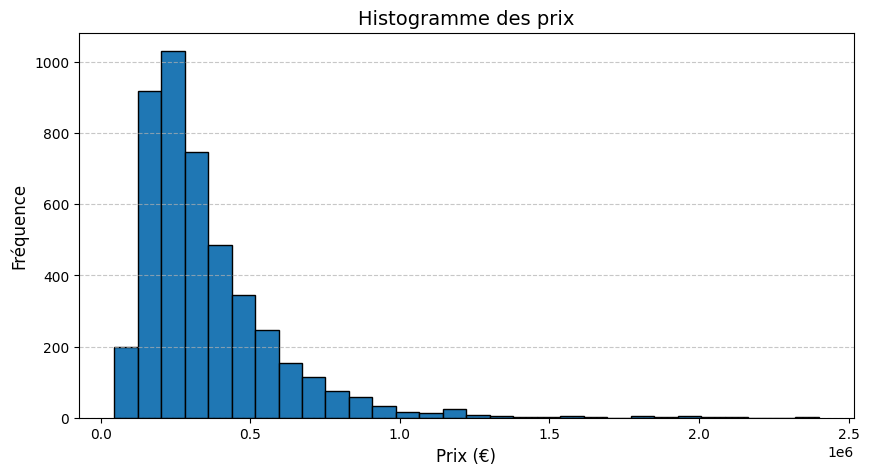

In [171]:
plt.figure(figsize=(10, 5))
df_immo["Prix"].dropna().plot.hist(
    bins=30,
    edgecolor="black"  
)
plt.title("Histogramme des prix", fontsize=14)
plt.xlabel("Prix (€)", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)  
plt.show()

In [172]:
"""
df_immo["Prix"].dropna().plot.hist(bins=30, figsize=(10, 5))
plt.title("Histogramme des prix")
plt.xlabel("Prix")
plt.show()
"""

'\ndf_immo["Prix"].dropna().plot.hist(bins=30, figsize=(10, 5))\nplt.title("Histogramme des prix")\nplt.xlabel("Prix")\nplt.show()\n'

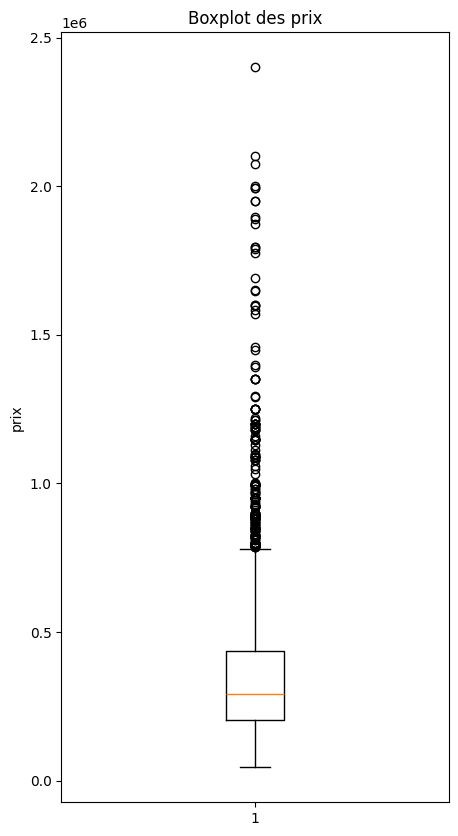

In [12]:

prix_b = df_immo["Prix"].dropna()

plt.figure(figsize=(5, 10))
plt.boxplot(prix_b)
plt.title("Boxplot des prix")
plt.ylabel("prix")
plt.show()

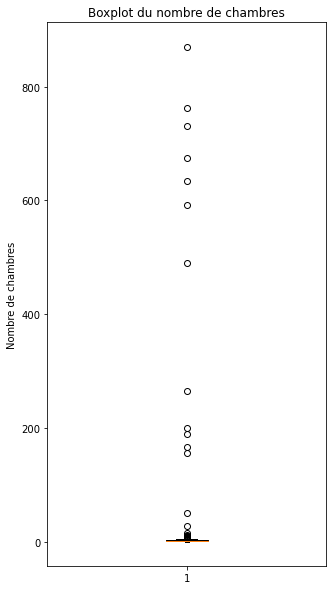

In [45]:
chambres = df_immo["Chambres"].dropna()

plt.figure(figsize=(5, 10))
plt.boxplot(chambres)
plt.title("Boxplot du nombre de chambres")
plt.ylabel("Nombre de chambres")
plt.show()

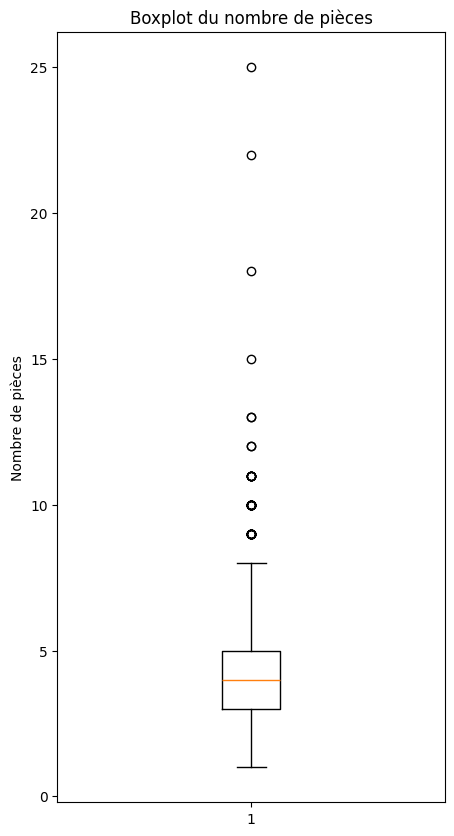

In [174]:
pieces = df_immo["Pièces"].dropna()

plt.figure(figsize=(5, 10))
plt.boxplot(pieces)
plt.title("Boxplot du nombre de pièces")
plt.ylabel("Nombre de pièces")
plt.show()

In [46]:
#df_immo["Chambres"].dropna().plot.hist(bins=30, figsize=(10, 5))
#plt.title("Histogramme des Chambres")
#plt.xlabel("Nb Chambres")
#plt.show()

In [9]:
df_immo['Date_publication'] = pd.to_datetime(df_immo['Date de publication'])

df_immo['Date_publication'].dt.year.value_counts()
#df_immo['Date_publication'].dt.month.value_counts().sort_index()

Date_publication
2025    2822
2024    1539
2023      93
2022      36
2021       5
2020       2
2018       2
2019       1
Name: count, dtype: int64

In [10]:
Mois=df_immo['Date_publication'].dt.month
Annee=df_immo['Date_publication'].dt.year

table = pd.crosstab(Annee, Mois)
#print(table)

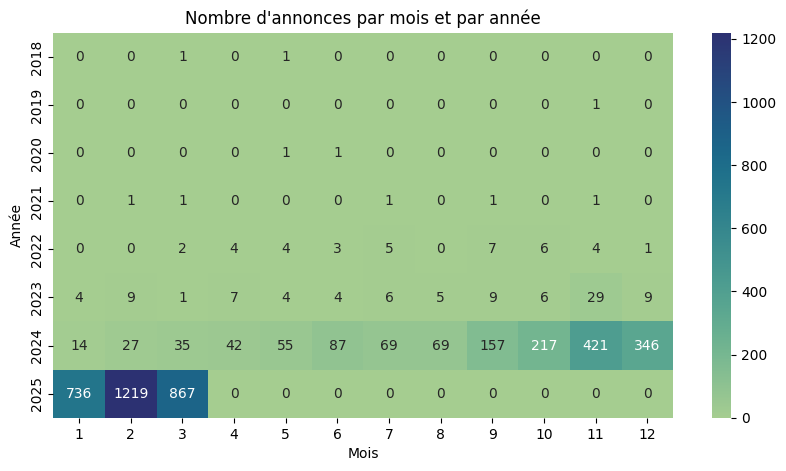

In [15]:

plt.figure(figsize=(10, 5))
sns.heatmap(table, annot=True, fmt="d", cmap="crest")
plt.title("Nombre d'annonces par mois et par année")
plt.xlabel("Mois")
plt.ylabel("Année")
plt.show()

In [16]:
chambres = df_immo["Chambres"].dropna()

# Calcul des quartiles
Q1 = chambres.quantile(0.25)
Q3 = chambres.quantile(0.75)
IQR = Q3 - Q1

# Détection des outliers
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

outliers = df_immo[(df_immo["Chambres"] < borne_inf) | (df_immo["Chambres"] > borne_sup)]

print("Bornes:", borne_inf, "à", borne_sup)
print("Nombre d'outliers estimés :", outliers.shape[0])


Bornes: 0.5 à 4.5
Nombre d'outliers estimés : 285


In [17]:
outliers.sort_values("Chambres", ascending=False).head(5) 

,ID,Titre,Prix,Localisation,Surface,Pièces,Chambres,DPE,Description,Date de publication,Agence,Logo de l'agence,Images,Lien annonce,Lien page source,Caracteristiques,Date_publication
3137,xwtknb,Maison • 236 m² • 6 pièces • Ter. 870 m²,890000.0,Francheville (69340),236.00,6.0,870.0,b,À Vendre : Superbe Maison Rénovée de 236 m² su...,2024-10-02,Hamac Investissements & Patrimoine,https://photo.superimmo.com/sgcdf0b28avzrzha3u...,['https://photo.superimmo.com/24kml8l77hvf5t4o...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 284 000 €; Prix au m² : 3 463 ...,2024-10-02
1413,xxepu7,"Maison • 100,44 m² • 6 pièces • Ter. 762 m²",319000.0,Belleville-en-Beaujolais (69220),100.44,6.0,762.0,f,PROCHE BELLEVILLE EN BEAUJOLAIS (69220) - Dans...,2024-12-05,SUNNYMMO,https://photo.superimmo.com/6dh1uo0prg99bm053o...,['https://photo.superimmo.com/1ur7mv5we1fo8y9p...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 260 000 €; Prix au m² : 2 986 ...,2024-12-05
3321,xxvzca,Maison • 140 m² • 5 pièces • Ter. 731 m²,535000.0,Châtillon (69380),140.00,5.0,731.0,d,A VOIR SANS TARDER ! A CHÂTILLON\nMAGNIFIQUE M...,2025-02-15,Pietrapolis,https://photo.superimmo.com/27ifryv671vexoayhc...,['https://photo.superimmo.com/qbqsewfl04ttj1lz...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 269 000 €; Prix au m² : 4 203 ...,2025-02-15
2898,xy1nmh,Maison • 120 m² • 3 chambres • Ter. 675 m²,161010.0,"Cours (69240, 69470) - Cours-la-Ville",120.00,3.0,675.0,d,Offre unique à saisir !\nCette charmante maiso...,2025-03-10,Agence BBii,https://photo.superimmo.com/tf30d1drsjeci5v2zp...,['https://photo.superimmo.com/roq0wm3o6we2cpz7...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 595 000 €; Prix au m² : 3 889 ...,2025-03-10
1629,xxysgb,Maison • 115 m² • 5 pièces • Ter. 635 m²,530000.0,Vernaison (69390),115.00,5.0,635.0,b,"Exclusivité ECOTRANSAC,\nSitué sur la commune ...",2025-02-27,Ecotransac,https://photo.superimmo.com/fg9pr0jmll4gvdwono...,['https://photo.superimmo.com/7ehm9pf3xyrmw7fl...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 269 000 €; Prix au m² : 3 736 ...,2025-02-27


In [18]:
anomalies = df_immo[(df_immo["Chambres"] >df_immo["Pièces"]) ]
anomalies.shape

(17, 17)

In [49]:
anomalies

,ID,Titre,Prix,Localisation,Surface,Pièces,Chambres,DPE,Description,Date de publication,Agence,Logo de l'agence,Images,Lien annonce,Lien page source,Caracteristiques,Date_publication
502,xy0fk4,Maison • 325 m² • 7 pièces • Ter. 28 328 m²,685000.0,Courzieu (69690),325.00,7.0,28.0,d,iad France - Carole Tulkens vous propose: Dans...,2025-03-05,Carole TULKENS - iad,https://photo.superimmo.com/436n0hg3lyikcp1ity...,['https://photo.superimmo.com/xixisjerg32svz23...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 195 000 €; Prix au m² : 3 362 ...,2025-03-05
738,xxts1s,Maison • 167 m² • 6 pièces • Ter. 189 m²,265000.0,Juliénas (69840),167.00,6.0,189.0,d,PROCHE JULIÉNAS (69840). NOUVEAUTÉ SUNNYMMO ! ...,2025-02-07,SUNNYMMO,https://photo.superimmo.com/6dh1uo0prg99bm053o...,['https://photo.superimmo.com/ucehtv168cqisi03...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 265 000 €; Prix au m² : 1 587 ...,2025-02-07
965,xxu5al,Maison • 270 m² • 5 pièces • Ter. 265 m²,295000.0,Genay (69730),270.00,5.0,265.0,d,Ce bien est à vendre en vente interactive réal...,2025-02-08,NOVEA Immobilier,https://photo.superimmo.com/p76byve44qedqz4fzn...,['https://photo.superimmo.com/tctb1chqndte9d15...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 290 000 €; Prix au m² : 3 625 ...,2025-02-08
1001,xxzw1i,"Appartement • 56,52 m² • 4 pièces • 6 chambres",219000.0,Champagne-au-Mont-d'Or (69410),56.52,4.0,6.0,f,"En plein coeur de Champagne, avenue de Lanessa...",2025-03-03,Michelin Immobilier,https://photo.superimmo.com/tlios6iudr47eu9tji...,['https://photo.superimmo.com/91wsylllf1hvwck4...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 239 000 €; Prix au m² : 4 268 ...,2025-03-03
1413,xxepu7,"Maison • 100,44 m² • 6 pièces • Ter. 762 m²",319000.0,Belleville-en-Beaujolais (69220),100.44,6.0,762.0,f,PROCHE BELLEVILLE EN BEAUJOLAIS (69220) - Dans...,2024-12-05,SUNNYMMO,https://photo.superimmo.com/6dh1uo0prg99bm053o...,['https://photo.superimmo.com/1ur7mv5we1fo8y9p...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 260 000 €; Prix au m² : 2 986 ...,2024-12-05
1629,xxysgb,Maison • 115 m² • 5 pièces • Ter. 635 m²,530000.0,Vernaison (69390),115.00,5.0,635.0,b,"Exclusivité ECOTRANSAC,\nSitué sur la commune ...",2025-02-27,Ecotransac,https://photo.superimmo.com/fg9pr0jmll4gvdwono...,['https://photo.superimmo.com/7ehm9pf3xyrmw7fl...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 269 000 €; Prix au m² : 3 736 ...,2025-02-27
1874,xxzi5z,"Maison • 214,52 m² • 5 pièces • 7 chambres • T...",535000.0,Blacé (69460),214.52,5.0,7.0,e,VENTE EXCLUSIVE DE DEUX AISONS INDIVIDUELLES!\...,2025-03-01,Regie Bertrand-Depagneux,https://photo.superimmo.com/55wun77t6v0bqcloqu...,['https://photo.superimmo.com/dv1je2nc18ogmo80...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 495 000 €; Prix au m² : 5 562 ...,2025-03-01
1951,xy0rrl,Maison • 140 m² • 6 pièces • Ter. 592 m²,495000.0,Lentilly (69210),140.00,6.0,592.0,f,iad France - Corinne Barou vous propose: Maiso...,2025-03-06,Corinne BAROU - iad,https://photo.superimmo.com/436n0hg3lyikcp1ity...,['https://photo.superimmo.com/z9tpt0zt06ult1qt...,https://www.superimmo.com/annonces/achat-maiso...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 115 000 €; Prix au m² : 7 667 ...,2025-03-06
2427,xxd9kq,Maison • 4 pièces • 3 chambres • Ter. 50 m²,279000.0,Mornant (69440),248.00,3.0,50.0,b,NOUVEAUTÉ en exclusivité dans votre agence GUY...,2024-12-04,Guy Hoquet Givors,https://photo.superimmo.com/p3zfa9im6e73lwrb9y...,['https://photo.superimmo.com/8li6e2bqyaivbago...,

Suppression des lignes où le prix manque

In [26]:
df_immo = df_immo[df_immo['Prix'].notnull()]


Remplacement des valeurs de chambres incohérentes par Null

In [182]:
df_immo.loc[df_immo['Chambres'] > df_immo['Pièces'], 'Chambres'] = np.nan


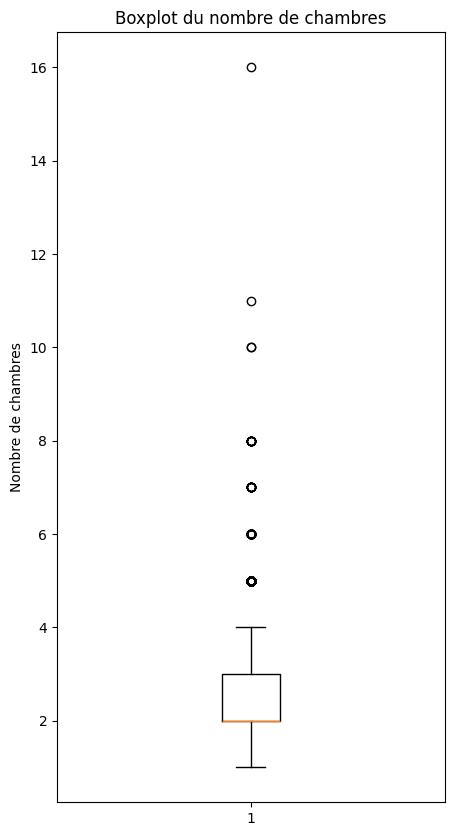

In [184]:
chambres = df_immo["Chambres"].dropna()

plt.figure(figsize=(5, 10))
plt.boxplot(chambres)
plt.title("Boxplot du nombre de chambres")
plt.ylabel("Nombre de chambres")
plt.show()

In [185]:
df_immo[["Prix", "Surface", "Pièces", "Chambres"]].describe()

,Prix,Surface,Pièces,Chambres
count,4.496000e+03,4500.000000,4414.000000,4210.000000
mean,3.540600e+05,93.233569,3.824196,2.620190
std,2.307962e+05,56.140010,1.725272,1.239418
min,4.500000e+04,10.900000,1.000000,1.000000
25%,2.049000e+05,60.000000,3.000000,2.000000
50%,2.900000e+05,79.520000,4.000000,2.000000
75%,4.350000e+05,110.000000,5.000000,3.000000
max,2.400000e+06,771.000000,25.000000,16.000000


Corrélation

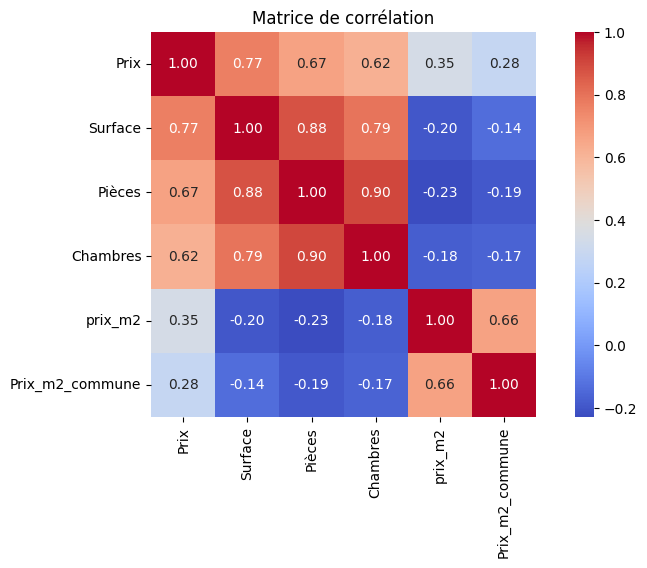

In [186]:
#matrice_corr=df_immo.corr()
matrice_corr = df_immo.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 5))
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matrice de corrélation')
plt.show()

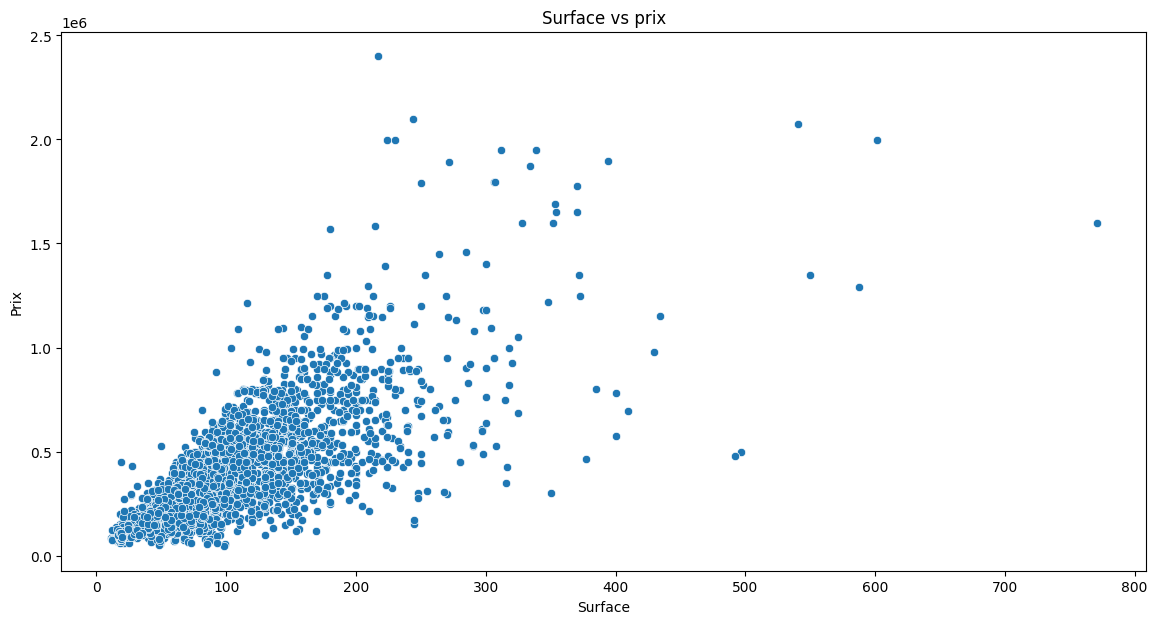

In [21]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_immo, x="Surface", y="Prix")
plt.title("Surface vs prix")
plt.xlabel("Surface")
plt.ylabel("Prix")
plt.show()

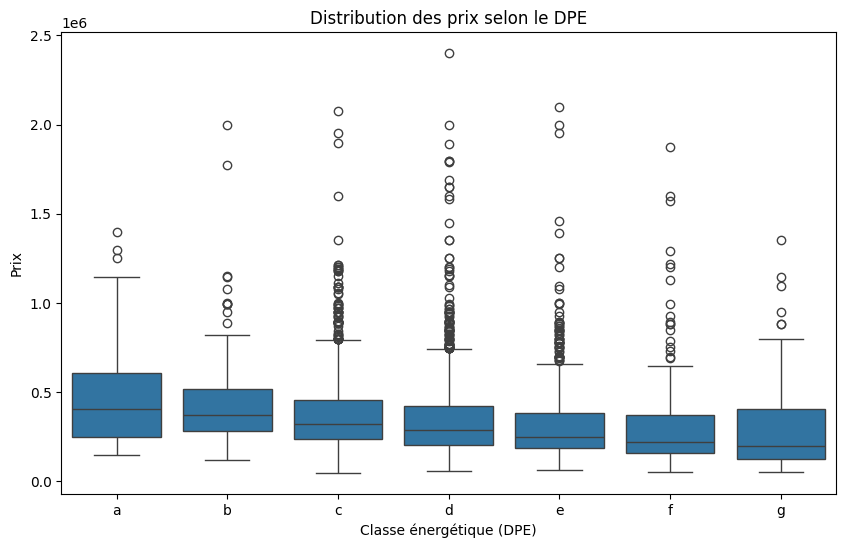

In [192]:
plt.figure(figsize=(10, 6))
ordre_dpe = ["a", "b", "c", "d", "e", "f", "g"]
sns.boxplot(data=df_immo, x="DPE", y="Prix", order=ordre_dpe)

plt.title("Distribution des prix selon le DPE")
plt.ylabel("Prix")
plt.xlabel("Classe énergétique (DPE)")
plt.show()

In [193]:
moyennes_par_dpe = df_immo.groupby("DPE")["Prix"].mean()
moyennes_par_dpe

DPE
a    487125.833333
b    427858.531401
c    376898.509448
d    349884.247701
e    319894.924528
f    307196.788845
g    296004.146341
Name: Prix, dtype: float64

In [177]:
df_immo["prix_m2"] = df_immo["Prix"] / df_immo["Surface"]


In [178]:
df_immo["Code_postal"] = df_immo["Localisation"].str.extract(r"\((\d{5})\)")
df_immo["Commune"] = df_immo["Localisation"].str.extract(r"^(.*?)\s*\(")


In [179]:
prix_m2_commune = df_immo.groupby("Commune")["prix_m2"].mean()
df_immo["Prix_m2_commune"] = df_immo["Commune"].map(prix_m2_commune)



In [13]:

def extraire_type_bien(titre: str) -> str:
    if pd.isna(titre):
        return "Inconnu"
    
    titre = titre.lower()
    
    # Détection par mots-clés
    if re.search(r'\bmaison\b', titre):
        return "Maison"
    elif re.search(r'\bappartement\b|\bappt\b', titre):
        return "Appartement"
    elif re.search(r'\bstudio\b', titre):
        return "Studio"
    elif re.search(r'\bvilla\b', titre):
        return "Villa"
    elif re.search(r'\bloft\b', titre):
        return "Loft"
    elif re.search(r'\bterrain\b', titre):
        return "Terrain"
    elif re.search(r'\bduplex\b', titre):
        return "Duplex"
    elif re.search(r'\bchalet\b', titre):
        return "Chalet"
    elif re.search(r'\bbureau(x)?\b', titre):
        return "Bureau"
    elif re.search(r'\blocaux?\b|\bcommerce\b', titre):
        return "Local commercial"
    
    return "Autre"

# Exemple d’utilisation sur ton DataFrame
df_immo["Type_bien"] = df_immo["Titre"].apply(extraire_type_bien)

/var/folders/c9/zy5ldbcx3t9gz5mz6yb9kp540000gp/T/ipykernel_12887/1779932960.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis")


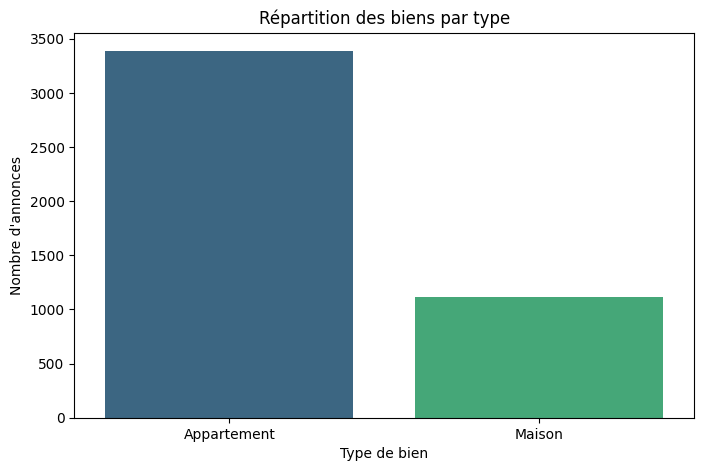

In [194]:
type_counts = df_immo['Type_bien'].value_counts()

# Diagramme à barres
plt.figure(figsize=(8,5))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis")
plt.title("Répartition des biens par type")
plt.ylabel("Nombre d'annonces")
plt.xlabel("Type de bien")
plt.show()

In [189]:
df_immo["Type_bien"].value_counts()

Type_bien
Appartement    3387
Maison         1113
Name: count, dtype: int64

In [22]:
taux_na = df_immo.isnull().mean() * 100
taux_na

ID                     0.000000
Titre                  0.000000
Prix                   0.088889
Localisation           0.000000
Surface                0.000000
Pièces                 0.088889
Chambres               6.066667
DPE                    0.000000
Description            0.000000
Date de publication    0.000000
Agence                 0.000000
Logo de l'agence       0.000000
Images                 0.000000
Lien annonce           0.000000
Lien page source       0.000000
Caracteristiques       0.000000
Date_publication       0.000000
prix_m2                0.088889
Code_postal            0.488889
Ville                  0.000000
nb_char_description    0.000000
nb_mots_description    0.000000
Commune                0.000000
Prix_m2_commune        0.000000
dtype: float64

In [25]:
df_immo[df_immo['Prix'].isnull()]


,ID,Titre,Prix,Localisation,Surface,Pièces,Chambres,DPE,Description,Date de publication,...,Lien page source,Caracteristiques,Date_publication,prix_m2,Code_postal,Ville,nb_char_description,nb_mots_description,Commune,Prix_m2_commune
775,xx49y5,"Appartement • 106,53 m² • 5 pièces • 3 chambres",NaN,Villeurbanne (69100),106.53,5.0,3.0,c,Sous compromis : SOUS OFFRE\nVilleurbanne / Ly...,2024-11-07,...,https://www.superimmo.com/achat/rhone-alpes/rh...,"Charges prévisionnelles : 1 987 € / an; 106,53...",2024-11-07,NaN,69100,Villeurbanne,2256,353,Villeurbanne,3977.100962
1022,xwucli,Appartement • 52 m² • 3 pièces • 2 chambres,NaN,Caluire-et-Cuire (69300),52.00,3.0,2.0,d,"Sous compromis : Grande Rue de St Clair, a 15 ...",2024-10-04,...,https://www.superimmo.com/achat/rhone-alpes/rh...,Charges prévisionnelles : 780 € / an; 52 m² - ...,2024-10-04,NaN,69300,Caluire-et-Cuire,645,105,Caluire-et-Cuire,4168.591580
1572,xuzwd8,"Appartement • 42,7 m² • 2 pièces",NaN,Vaulx-en-Velin (69120),42.70,2.0,NaN,a,"Découvrez nos nouveaux appartements, du studio...",2024-02-28,...,https://www.superimmo.com/achat/rhone-alpes/rh...,"42,7 m² - 2 pièces; 1er étage avec ascenseur; ...",2024-02-28,NaN,69120,Vaulx-en-Velin,1173,181,Vaulx-en-Velin,3018.140896
2770,xxzgxl,"Appartement • 19,15 m² • Meublé • 1 pièce • 1 ...",NaN,Lyon 9ème (69009),19.15,1.0,1.0,c,SPECIAL INVESTISSEUR.\nStudio de 19.15 m² vend...,2025-03-01,...,https://www.superimmo.com/achat/rhone-alpes/rh...,"Charges prévisionnelles : 435,24 € / an; 19,15...",2025-03-01,NaN,69009,Lyon 9ème,2377,385,Lyon 9ème,4048.493846


In [13]:
def get_pieces_from_titre(titre):
    match = re.search(r"(\d+)\s*pièces?", titre.lower())
    if match:
        return int(match.group(1))
    return np.nan

In [14]:
df_immo.loc[df_immo["Pièces"].isna(), "Pièces"] = df_immo.loc[df_immo["Pièces"].isna(), "Titre"].apply(get_pieces_from_titre)


In [15]:
df_immo[df_immo['Pièces'].isnull()]

,ID,Titre,Prix,Localisation,Surface,Pièces,Chambres,DPE,Description,Date de publication,Agence,Logo de l'agence,Images,Lien annonce,Lien page source,Caracteristiques,Date_publication,prix_m2,Code_postal,Ville
1263,xx7ao6,Appartement • 19 m²,82300.0,Lyon 4ème (69004),19.0,NaN,NaN,d,Appartement idéal investissement.\nStudio quar...,2024-11-18,PURPLE IMMOBILIER,https://photo.superimmo.com/kmgl3pukn35p3rdamz...,['https://photo.superimmo.com/458lmdeba5736yri...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 270 000 €; Prix au m² : 3 943 ...,2024-11-18,4331.578947,69004,Lyon 4ème
1303,xx21tt,"Appartement • 47,8 m²",292000.0,Tassin-la-Demi-Lune (69160),47.8,NaN,NaN,d,Cet appartement est une opportunité rare pour ...,2024-10-29,Keller Williams Immobilier Lyon,https://photo.superimmo.com/t17nx57htqchsqphdl...,['https://photo.superimmo.com/2fw8yaso5fj792vk...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 260 000 €; Prix au m² : 3 291 ...,2024-10-29,6108.786611,69160,Tassin-la-Demi-Lune
2542,xxhy3p,"Appartement • 51,9 m²",240000.0,Oullins (69600),51.9,NaN,NaN,e,Lots de studios - forte rentabilité - spécial ...,2024-12-17,Hamac Investissements & Patrimoine,https://photo.superimmo.com/sgcdf0b28avzrzha3u...,['https://photo.superimmo.com/3iy47diopq140jxw...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 549 000 €; Prix au m² : 4 357 ...,2024-12-17,4624.277457,69600,Oullins
3585,xwnxlq,Appartement • 85 m²,135000.0,Vindry-sur-Turdine (69490),85.0,NaN,NaN,e,T4 avec vue magnifiqueCampagn'immo vous propos...,2024-09-11,Campagn'Immo,https://photo.superimmo.com/cb29b1398qpc6oy2rz...,['https://photo.superimmo.com/5f3np41ww8722e6z...,https://www.superimmo.com/annonces/achat-appar...,https://www.superimmo.com/achat/rhone-alpes/rh...,Prix de vente : 480 000 €; Prix au m² : 4 404 ...,2024-09-11,1588.235294,69490,Vindry-sur-Turdine


In [16]:
df_immo["nb_char_description"] = df_immo["Description"].astype(str).str.len()
df_immo["nb_mots_description"] = df_immo["Description"].str.split().str.len()


In [39]:
df_immo[["nb_char_description", "nb_mots_description"]].describe()

,nb_char_description,nb_mots_description
count,4500.000000,4500.000000
mean,1414.721333,229.068667
std,700.421615,113.322160
min,58.000000,9.000000
25%,887.000000,145.000000
50%,1317.000000,214.500000
75%,1833.250000,298.000000
max,5024.000000,820.000000


/var/folders/c9/zy5ldbcx3t9gz5mz6yb9kp540000gp/T/ipykernel_43185/621909734.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


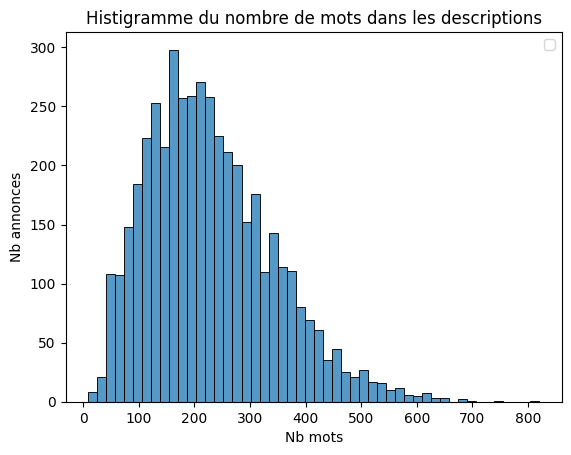

In [50]:
sns.histplot(df_immo["nb_mots_description"], bins=50)
plt.title("Histigramme du nombre de mots dans les descriptions")
plt.xlabel("Nb mots")
plt.ylabel("Nb annonces")
plt.legend()
plt.show()

/var/folders/c9/zy5ldbcx3t9gz5mz6yb9kp540000gp/T/ipykernel_43185/1520227551.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


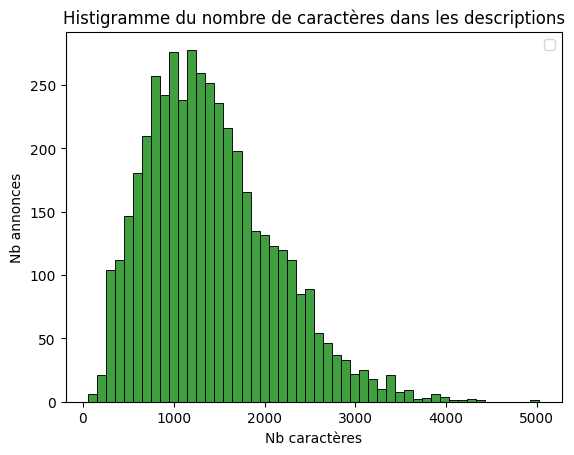

In [49]:
sns.histplot(df_immo["nb_char_description"], bins=50, color='green')
plt.title("Histigramme du nombre de caractères dans les descriptions")
plt.xlabel("Nb caractères")
plt.ylabel("Nb annonces")
plt.legend()
plt.show()

In [47]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
df_immo[df_immo["nb_char_description"] < 100][["Description"]].head(10)


,Description
440,"LYON 8 - T2, séjour, une chambre, terrasse avec vue dégagée. Aucun travaux à prévoir."
2841,. Logement à consommation énergétique excessive : classe G
4304,"OFF MARKET ,Belle maison traditionelle de 6 Pièces, 4 chambres , piscine, garage double et cave ."


In [36]:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

display(df_immo['Description'].head(20))
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   T4 Villeurbanne Perralière garage possible\nT4 74m² Villeurbanne\nJe vous propose en exclusivité cet

# Enrichir via le LLM mon dataframe 
Utilisation du structured output (langchain)

In [2]:

# Charger les variables depuis le fichier .env
load_dotenv()

# Récupérer la clé API
api_key = os.getenv("OPENAI_API_KEY")
langsmith_key= os.getenv("LANGSMITH_API_KEY")


In [3]:
from pydantic import BaseModel, Field
from typing import List, Literal

class Analyse_Description(BaseModel):
    travaux_a_prevoir: bool = Field(
        ..., description="Le bien nécessite-t-il des travaux ?"
    )
    etat_du_bien: Literal["neuf", "bon état", "à rénover", "non précisé"]
    atouts: List[str] = Field(
        ..., description="atouts mentionnés comme garage, piscine, clim, ascenceur,jardin, terrasse , balcon, cave, jardin etc."
    )


piscine/ascenceur/jardin/terrasse/garage/balcon/type de bien (villa/appartement/studio?/travaux à prévoir)
etat du bien (neuf, bon état, à renover )

In [5]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0, api_key=api_key)
structured_llm_desc = llm.with_structured_output(Analyse_Description)


In [6]:
from langchain_core.prompts import ChatPromptTemplate

description_prompt = ChatPromptTemplate.from_messages([
    ("system", """Tu es un assistant immobilier. Extrait les informations demandées à partir de la description."""),
    ("human", "{description}")
])

retrieval_description = description_prompt | structured_llm_desc

In [55]:
df_immo['Description'][0]

"T4 Villeurbanne Perralière garage possible\nT4 74m² Villeurbanne\nJe vous propose en exclusivité cet appartement :\nIl se compose d'une entrée, d'un séjour, d'une cuisine, 3 chambres, une salle de bain et des toilettes. toutes les pièces à part la cuisine donnent sur le balcon filant. L'appartement est entièrement climatisé.\nune cave complète l'appartement et un garage box en sous-sol est possible pour 15 000 € supplémentaire.\nSitué à la Perralière, vous trouverez tous les commerces à proximité. l'arrêt de métro Flachet à moins de 5 minutes à pieds ainsi que le tram Grand clément à peu près à la même distance. De plus des pistes cyclables sont accessibles facilement.\nSitué dans un grand parc avec terrain de tennis et jeux de pétanques, vous aurez de quoi vous détendre et prendre l'air dans la pelouse et au milieu des arbres.\nInformations techniques :\nNombre de lots dans la copropriété 500.\nLes charges qui comprennent le chauffage, la consommation d'eau froide et chaude, l'entret

In [7]:

example_desc = df_immo['Description'][0]
result = retrieval_description.invoke({"description": example_desc})
result

Analyse_Description(travaux_a_prevoir=False, etat_du_bien='bon état', atouts=['garage possible', 'balcon', 'cave', 'climatisation', 'parc avec terrain de tennis', 'pistes cyclables'])

In [60]:
from langchain.callbacks import get_openai_callback
with get_openai_callback() as cb:
    docs = retrieval_description.invoke({"description":df_immo.iloc[1]["Description"]})
print(cb.total_cost, cb.total_tokens)
print(docs)

0.0 481
travaux_a_prevoir=False etat_du_bien='bon état' atouts=['climatisation', 'terrasse', 'piscine', 'jardin', 'terrain de pétanque', 'salle de bain', 'wc', 'chambres avec placards', 'double exposition']


In [ ]:
with get_openai_callback() as cb:
    docs = retrieval_description.batch([{"description":df_immo.iloc[i]["Description"]} for i in range(100)])
print(cb.total_cost, cb.total_tokens)

In [38]:
from langchain.callbacks import get_openai_callback


In [39]:
batch_size = 10
total = 20
all_results = []

# Boucle sur les batchs
for i in tqdm(range(0, total, batch_size)):
    batch_descriptions = [{"description": df_immo.iloc[j]["Description"]} for j in range(i, min(i + batch_size, total))]
    
    try:
        with get_openai_callback() as cb:
            batch_results = retrieval_description.batch(batch_descriptions)
            print(f"Batch {i}-{i + batch_size} | Tokens: {cb.total_tokens} | Cost: ${cb.total_cost:.4f}")
            all_results.extend(batch_results)
    except Exception as e:
        print(f" Erreur au batch {i}-{i + batch_size}: {e}")
        all_results.extend([None] * len(batch_descriptions))


 50%|█████     | 1/2 [00:07<00:07,  7.05s/it]

Batch 0-10 | Tokens: 6046 | Cost: $0.0000


100%|██████████| 2/2 [00:14<00:00,  7.22s/it]

Batch 10-20 | Tokens: 6023 | Cost: $0.0000


In [44]:
batch_size = 100
total = len(df_immo)
all_results = []

# Boucle sur les batchs
for i in tqdm(range(0, total, batch_size)):
    batch_descriptions = [{"description": df_immo.iloc[j]["Description"]} for j in range(i, min(i + batch_size, total))]
    
    try:
        with get_openai_callback() as cb:
            batch_results = retrieval_description.batch(batch_descriptions)
            print(f"Batch {i}-{i + batch_size} | Tokens: {cb.total_tokens} | Cost: ${cb.total_cost:.4f}")
            all_results.extend(batch_results)
    except Exception as e:
        print(f" Erreur au batch {i}-{i + batch_size}: {e}")
        all_results.extend([None] * len(batch_descriptions))


  2%|▏         | 1/45 [00:19<14:17, 19.49s/it]

Batch 0-100 | Tokens: 59231 | Cost: $0.0000


  4%|▍         | 2/45 [00:34<12:15, 17.11s/it]

Batch 100-200 | Tokens: 61365 | Cost: $0.0000


  7%|▋         | 3/45 [00:49<11:09, 15.95s/it]

Batch 200-300 | Tokens: 61327 | Cost: $0.0000


  9%|▉         | 4/45 [01:03<10:15, 15.02s/it]

Batch 300-400 | Tokens: 57290 | Cost: $0.0000


 11%|█         | 5/45 [01:16<09:38, 14.47s/it]

Batch 400-500 | Tokens: 56366 | Cost: $0.0000


 13%|█▎        | 6/45 [02:02<16:20, 25.14s/it]

Batch 500-600 | Tokens: 62017 | Cost: $0.0000


 16%|█▌        | 7/45 [02:20<14:24, 22.74s/it]

Batch 600-700 | Tokens: 57787 | Cost: $0.0000


 18%|█▊        | 8/45 [02:36<12:43, 20.63s/it]

Batch 700-800 | Tokens: 56155 | Cost: $0.0000


 20%|██        | 9/45 [02:49<10:59, 18.32s/it]

Batch 800-900 | Tokens: 61014 | Cost: $0.0000


 22%|██▏       | 10/45 [03:08<10:51, 18.61s/it]

Batch 900-1000 | Tokens: 56973 | Cost: $0.0000


 24%|██▍       | 11/45 [03:26<10:21, 18.28s/it]

Batch 1000-1100 | Tokens: 57762 | Cost: $0.0000


 27%|██▋       | 12/45 [03:44<10:04, 18.31s/it]

Batch 1100-1200 | Tokens: 59276 | Cost: $0.0000


 29%|██▉       | 13/45 [04:00<09:24, 17.64s/it]

Batch 1200-1300 | Tokens: 59675 | Cost: $0.0000


 31%|███       | 14/45 [04:37<12:06, 23.42s/it]

Batch 1300-1400 | Tokens: 57289 | Cost: $0.0000


 33%|███▎      | 15/45 [04:51<10:17, 20.60s/it]

Batch 1400-1500 | Tokens: 56971 | Cost: $0.0000


 36%|███▌      | 16/45 [05:04<08:52, 18.37s/it]

Batch 1500-1600 | Tokens: 57593 | Cost: $0.0000


 38%|███▊      | 17/45 [05:20<08:12, 17.58s/it]

Batch 1600-1700 | Tokens: 59680 | Cost: $0.0000


 40%|████      | 18/45 [05:37<07:45, 17.25s/it]

Batch 1700-1800 | Tokens: 59111 | Cost: $0.0000


 42%|████▏     | 19/45 [05:48<06:43, 15.52s/it]

Batch 1800-1900 | Tokens: 61822 | Cost: $0.0000


 44%|████▍     | 20/45 [06:31<09:55, 23.83s/it]

Batch 1900-2000 | Tokens: 59620 | Cost: $0.0000


 47%|████▋     | 21/45 [06:51<08:59, 22.49s/it]

Batch 2000-2100 | Tokens: 58330 | Cost: $0.0000


 49%|████▉     | 22/45 [07:08<08:02, 20.97s/it]

Batch 2100-2200 | Tokens: 58996 | Cost: $0.0000


 51%|█████     | 23/45 [07:24<07:10, 19.56s/it]

Batch 2200-2300 | Tokens: 62849 | Cost: $0.0000


 53%|█████▎    | 24/45 [08:14<10:02, 28.71s/it]

Batch 2300-2400 | Tokens: 58682 | Cost: $0.0000


 56%|█████▌    | 25/45 [08:50<10:13, 30.69s/it]

Batch 2400-2500 | Tokens: 57430 | Cost: $0.0000


 58%|█████▊    | 26/45 [09:19<09:35, 30.30s/it]

Batch 2500-2600 | Tokens: 63108 | Cost: $0.0000


 60%|██████    | 27/45 [09:33<07:38, 25.45s/it]

Batch 2600-2700 | Tokens: 60566 | Cost: $0.0000


 62%|██████▏   | 28/45 [09:49<06:20, 22.41s/it]

Batch 2700-2800 | Tokens: 65924 | Cost: $0.0000


 64%|██████▍   | 29/45 [10:12<06:04, 22.79s/it]

Batch 2800-2900 | Tokens: 59408 | Cost: $0.0000


 67%|██████▋   | 30/45 [10:37<05:51, 23.40s/it]

Batch 2900-3000 | Tokens: 58147 | Cost: $0.0000


 69%|██████▉   | 31/45 [11:29<07:25, 31.83s/it]

Batch 3000-3100 | Tokens: 59911 | Cost: $0.0000


 71%|███████   | 32/45 [11:53<06:24, 29.59s/it]

Batch 3100-3200 | Tokens: 56869 | Cost: $0.0000


 73%|███████▎  | 33/45 [12:47<07:22, 36.91s/it]

Batch 3200-3300 | Tokens: 59458 | Cost: $0.0000


 76%|███████▌  | 34/45 [13:03<05:37, 30.64s/it]

Batch 3300-3400 | Tokens: 58005 | Cost: $0.0000


 78%|███████▊  | 35/45 [13:21<04:28, 26.81s/it]

Batch 3400-3500 | Tokens: 61156 | Cost: $0.0000


 80%|████████  | 36/45 [13:37<03:33, 23.71s/it]

Batch 3500-3600 | Tokens: 59046 | Cost: $0.0000


 82%|████████▏ | 37/45 [13:52<02:47, 20.90s/it]

Batch 3600-3700 | Tokens: 62657 | Cost: $0.0000


 84%|████████▍ | 38/45 [14:06<02:12, 18.92s/it]

Batch 3700-3800 | Tokens: 58059 | Cost: $0.0000


 87%|████████▋ | 39/45 [14:21<01:47, 17.84s/it]

Batch 3800-3900 | Tokens: 62507 | Cost: $0.0000


 89%|████████▉ | 40/45 [15:00<02:00, 24.07s/it]

Batch 3900-4000 | Tokens: 61545 | Cost: $0.0000


 91%|█████████ | 41/45 [15:16<01:27, 21.81s/it]

Batch 4000-4100 | Tokens: 62773 | Cost: $0.0000


 93%|█████████▎| 42/45 [15:34<01:02, 20.67s/it]

Batch 4100-4200 | Tokens: 57220 | Cost: $0.0000


 96%|█████████▌| 43/45 [15:52<00:39, 19.89s/it]

Batch 4200-4300 | Tokens: 59592 | Cost: $0.0000


 98%|█████████▊| 44/45 [17:08<00:36, 36.59s/it]

Batch 4300-4400 | Tokens: 60286 | Cost: $0.0000


100%|██████████| 45/45 [17:23<00:00, 23.20s/it]

Batch 4400-4500 | Tokens: 60075 | Cost: $0.0000


In [45]:
df_structured = pd.DataFrame([res.dict() for res in all_results])
df_structured

/var/folders/c9/zy5ldbcx3t9gz5mz6yb9kp540000gp/T/ipykernel_19670/2998217012.py:1: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  df_structured = pd.DataFrame([res.dict() for res in all_results])


,travaux_a_prevoir,etat_du_bien,atouts
0,False,bon état,"[garage possible, balcon, cave, climatisation,..."
1,False,bon état,"[climatisation, terrasse, piscine, jardin, ter..."
2,False,bon état,"[balcon, deux places de stationnements sécuris..."
3,False,bon état,"[dernier étage, traversant, lumineux, cuisine ..."
4,False,neuf,"[cuisine équipée, placard, proximité commodités]"
...,...,...,...
4491,False,bon état,"[double garage, terrasse, placard mural, jardi..."
4492,True,à rénover,"[piscine creusée, garage double, cave à vin, t..."
4493,False,bon état,"[terrasse, ascenseur, cave, garage en supplément]"
4494,False,bon état,"[meublé, investissement locatif, services para..."


In [ ]:
df_immo_enrichi = pd.concat([df_immo.reset_index(drop=True), df_structured], axis=1)

In [7]:
codes_postaux = pd.read_csv('../data/external/base-officielle-codes-postaux.csv')
codes_postaux['code_postal'] = codes_postaux['code_postal'].astype(str)

codes_postaux.head()


,code_commune_insee,nom_de_la_commune,code_postal,libelle_d_acheminement,ligne_5,_geopoint,latitude,longitude
0,01001,L ABERGEMENT CLEMENCIAT,1400,L ABERGEMENT CLEMENCIAT,NaN,"46.15170180297285,4.930600521664882",46.151702,4.930601
1,01002,L ABERGEMENT DE VAREY,1640,L ABERGEMENT DE VAREY,NaN,"46.00713099777772,5.42467488805381",46.007131,5.424675
2,01004,AMBERIEU EN BUGEY,1500,AMBERIEU EN BUGEY,NaN,"45.957470664713995,5.370568254510258",45.957471,5.370568
3,01005,AMBERIEUX EN DOMBES,1330,AMBERIEUX EN DOMBES,NaN,"45.99922938293103,4.911871787269484",45.999229,4.911872
4,01006,AMBLEON,1300,AMBLEON,NaN,"45.74831432147182,5.592784714407381",45.748314,5.592785


In [8]:
codes_postaux_unique = (codes_postaux.groupby("code_postal", as_index=False).agg({"latitude": "mean", "longitude": "mean" }))


In [9]:
doublons = codes_postaux["code_postal"].value_counts()
doublons = doublons[doublons > 1]
codes_postaux[codes_postaux.duplicated(subset=["code_postal"], keep=False)] \
    .sort_values("code_postal")

,code_commune_insee,nom_de_la_commune,code_postal,libelle_d_acheminement,ligne_5,_geopoint,latitude,longitude
346,01344,ST DENIS LES BOURG,1000,ST DENIS LES BOURG,NaN,"46.20968046898236,5.182458783026558",46.209680,5.182459
63,01053,BOURG EN BRESSE,1000,BOURG EN BRESSE,NaN,"46.202711533144964,5.246911351896918",46.202712,5.246911
64,01053,BOURG EN BRESSE,1000,BOURG EN BRESSE,BROU,"46.202711533144964,5.246911351896918",46.202712,5.246911
3760,10323,ROMILLY SUR SEINE,10100,ROMILLY SUR SEINE,NaN,"48.51575627224973,3.715801833580954",48.515756,3.715802
3600,10164,GELANNES,10100,GELANNES,NaN,"48.475071693587786,3.671600321893864",48.475072,3.671600
...,...,...,...,...,...,...,...,...
39000,98723,HIVA OA,98796,FATU HUKU,HIVA OA,"-9.756225,-138.88690445",-9.756225,-138.886904
38999,98723,HIVA OA,98796,MOHOTANI,HIVA OA,"-9.756225,-138.88690445",-9.756225,-138.886904
39058,98731,NUKU HIVA,98796,EIAO,NUKU HIVA,"-8.8255433,-140.1303877",-8.825543,-140.130388
39057,98731,NUKU HIVA,98796,HATUTAA,NUKU HIVA,"-8.8255433,-140.1303877",-8.825543,-140.130388


In [10]:
df_immo_enrichi = df_immo_enrichi.merge(codes_postaux_unique[['code_postal', 'latitude', 'longitude']],
              left_on='Code_postal', right_on='code_postal', how='left')
df_immo_enrichi.head()

,ID,Titre,Prix,Localisation,Surface,Pièces,Chambres,DPE,Description,Date de publication,...,nb_char_description,nb_mots_description,Commune,Prix_m2_commune,travaux_a_prevoir,etat_du_bien,atouts,code_postal,latitude,longitude
0,xxuijv,Appartement • 77 m² • 4 pièces • 3 chambres,220000.0,Villeurbanne (69100),77.00,4.0,3.0,d,T4 Villeurbanne Perralière garage possible\nT4...,2025-02-10,...,1603,272,Villeurbanne,3977.100962,False,bon état,"[garage possible, balcon, cave, climatisation,...",69100,45.771879,4.889827
1,xy1hq1,Maison • 145 m² • 5 pièces • 4 chambres • Ter....,725000.0,Dommartin (69380),145.00,5.0,4.0,c,"Dommartin , à deux pas du golf de la Tour de S...",2025-03-08,...,842,158,Dommartin,5089.478951,False,bon état,"[climatisation, terrasse, piscine, jardin, ter...",69380,45.873274,4.696046
2,xxysg8,Appartement • 101 m² • 5 pièces,380000.0,Saint-Genis-Laval (69230),101.00,5.0,NaN,c,"Exclusivité ECOTRANSAC,\nVenez découvrir ce ma...",2025-02-27,...,1696,281,Saint-Genis-Laval,3677.087056,False,bon état,"[balcon, deux places de stationnements sécuris...",69230,45.692225,4.792862
3,xwmegh,Appartement • 63 m² • 3 pièces • 2 chambres,250000.0,Lyon 8ème (69008),63.00,3.0,2.0,d,*** OFFRE ACCEPTÉE ***\n69008 LYON - T3 DE 63 ...,2024-09-05,...,2463,419,Lyon 8ème,4133.356332,False,bon état,"[dernier étage, traversant, lumineux, cuisine ...",69008,45.734197,4.869549
4,xx813q,"Appartement • 67,41 m² • 3 pièces • 2 chambres",270000.0,Lyon 3ème (69003),67.41,3.0,2.0,e,LIMMO vous propose à la vente cet appartement ...,2024-11-20,...,731,116,Lyon 3ème,4705.451132,False,neuf,"[cuisine équipée, placard, proximité commodités]",69003,45.751413,4.868478


In [ ]:
print(df_immo_enrichi[['latitude','longitude']].isna().sum())
df_immo_enrichi_coord = df_immo_enrichi.dropna(subset=['latitude','longitude'])

In [ ]:
import folium
from folium.plugins import MarkerCluster
import webbrowser

# Gérer les NaN latitude/longitude ---
df_immo_enrichi_coord = df_immo_enrichi.dropna(subset=['latitude','longitude'])

# Créer la carte centrée sur Lyon ---
carte = folium.Map(location=[45.75, 4.85], zoom_start=12)

#Ajouter un cluster de markers ---
marker_cluster = MarkerCluster().add_to(carte)

for idx, row in df_immo_enrichi_coord.iterrows():
    popup_html = f"""
    <b>{row['Titre']}</b><br>
    Prix : {row['Prix']} €<br>
    Surface : {row['Surface']} m²<br>
    Pièces : {row['Pièces']}<br>
    <a href="{row['Lien annonce']}" target="_blank">Voir l'annonce</a>
    """
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_html
    ).add_to(marker_cluster)

# Sauvegarder la carte en HTML ---
fichier = os.path.abspath("carte_lyon.html")
carte.save(fichier)

# Ouvrir la carte dans le navigateur ---
webbrowser.open(f"file://{fichier}")

In [4]:

#with open("../data/processed/df_immo_enrichi.pkl", "wb") as f:
#    pickle.dump(df_immo_enrichi, f)

with open("../data/processed/df_immo_enrichi.pkl", "rb") as f:
    df_immo_enrichi = pickle.load(f)

In [14]:
df_immo_enrichi["Type_bien"] = df_immo_enrichi["Titre"].apply(extraire_type_bien)

In [16]:
df_immo_enrichi.columns

Index(['ID', 'Titre', 'Prix', 'Localisation', 'Surface', 'Pièces', 'Chambres',
       'DPE', 'Description', 'Date de publication', 'Agence',
       'Logo de l'agence', 'Images', 'Lien annonce', 'Lien page source',
       'Caracteristiques', 'Date_publication', 'prix_m2', 'Code_postal',
       'nb_char_description', 'nb_mots_description', 'Commune',
       'Prix_m2_commune', 'travaux_a_prevoir', 'etat_du_bien', 'atouts',
       'code_postal', 'latitude', 'longitude', 'Type_bien'],
      dtype='object')

In [15]:
df_immo_enrichi.shape

(4496, 30)

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sodagayethiam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
stop_words = set(stopwords.words('french'))
wc = WordCloud(background_color="black", max_words=100, stopwords=stop_words, max_font_size=50, random_state=42)


In [22]:
Atouts = df_immo_enrichi["atouts"].dropna().explode().tolist()
Atouts = [str(a) for a in Atouts]  # conversion en chaîne de caractères
text = " ".join(Atouts)

In [135]:
# Atouts distincts
atouts_uniques = set(Atouts)

print("Nombre d'atouts distincts :", len(atouts_uniques))
print("Liste des atouts :", atouts_uniques)

Nombre d'atouts distincts : 4483
Liste des atouts : {'parcelle arborée', 'terrain arboré', 'cellier indépendant', 'toiture refaite à neuve', 'exposé Sud', 'murs en pisé', 'emplacement prisé', 'musée des Beaux-Arts', 'cave à vin en pierre voûtée', 'salle de bain moderne avec baignoire et douche indépendantes', 'bien situé', 'salle de douche tendance', 'espace prêt pour piscine', 'proche tram T2', 'volets roulants aluminium isolant', 'rénovation complète par un architecte', 'salle de bain avec WC', 'situation centrale', 'ateliers', "deuxième salle d'eau", 'proximité tramway T2-T4-T6', "chambre d'hôte", 'volets roulants électriques BSO', 'SDE', 'stationnement privé en sous sol avec chargeur pour voiture électrique', 'ancien lavoir', 'deux chambres spacieuses', 'WC refait', 'places de stationnements libres', 'espace chambre avec grand lit', 'cuisine ouverte contemporaine', 'localisation proche commerces et transports', 'hauts plafonds moulurés', 'proche des gares SNCF', 'tram-train', 'gara

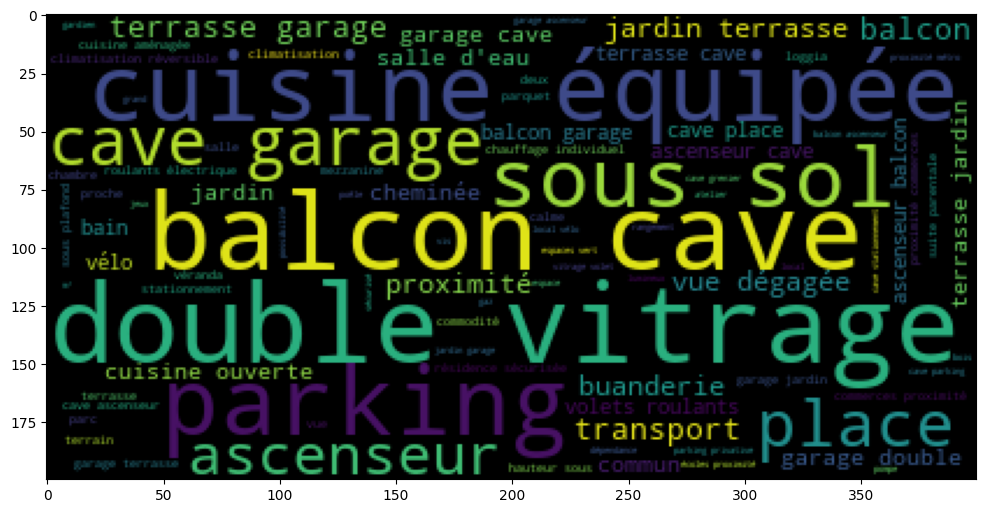

In [59]:
plt.figure(figsize= (12,10)) # Initialisation d'une figure
wc.generate(text)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()


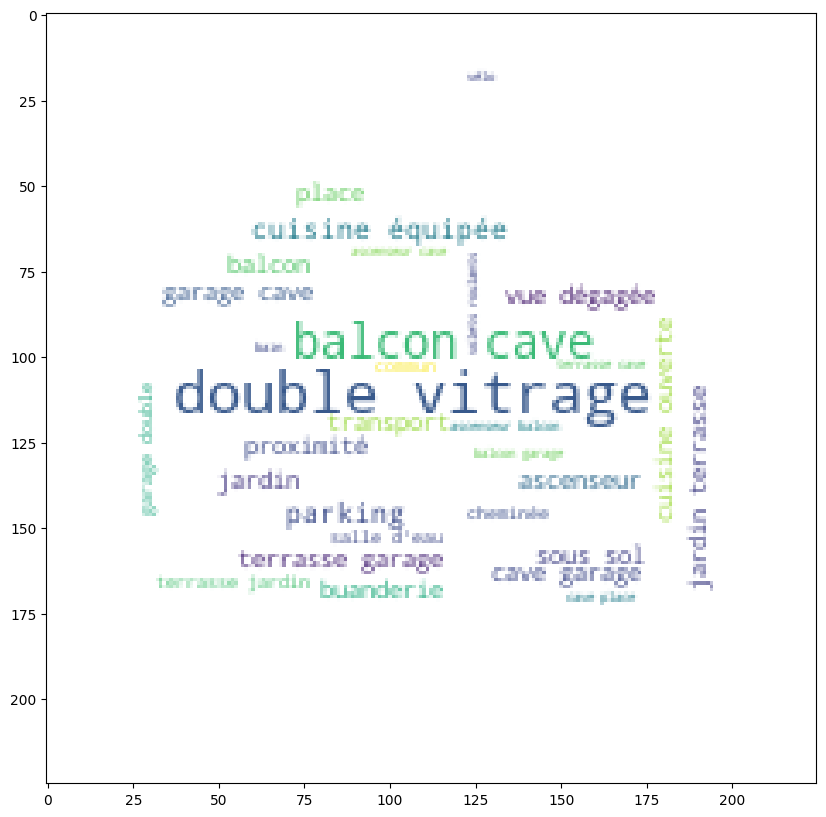

In [66]:
#test du masque en forme de maison
#tester avec un e phorto de meilleure qualité$# augmenter  le nb de mots 

from PIL import Image
import numpy as np

def plot_word_cloud(text, masque, background_color = "white") :
    mask_coloring = np.array(Image.open(str(masque)))

    # Définir le calque du nuage des mots
    wc = WordCloud(width=800, height=400, background_color=background_color, max_words=200, stopwords=stop_words, mask = mask_coloring, max_font_size=70, random_state=42)

    # Générer et afficher le nuage de mots
    plt.figure(figsize= (15,10))
    wc.generate(text)
    plt.imshow(wc)
    plt.show()

plot_word_cloud(text, "../data/external/masque_house.jpeg")

# Modèle de prediction du prix du m2 

In [306]:
df_immo_enrichi.columns

Index(['ID', 'Titre', 'Prix', 'Localisation', 'Surface', 'Pièces', 'Chambres',
       'DPE', 'Description', 'Date de publication', 'Agence',
       'Logo de l'agence', 'Images', 'Lien annonce', 'Lien page source',
       'Caracteristiques', 'Date_publication', 'prix_m2', 'Code_postal',
       'nb_char_description', 'nb_mots_description', 'Commune',
       'Prix_m2_commune', 'travaux_a_prevoir', 'etat_du_bien', 'atouts',
       'Type_bien', 'code_postal', 'latitude', 'longitude'],
      dtype='object')

In [202]:
df_immo_enrichi.columns

Index(['ID', 'Titre', 'Prix', 'Localisation', 'Surface', 'Pièces', 'Chambres',
       'DPE', 'Description', 'Date de publication', 'Agence',
       'Logo de l'agence', 'Images', 'Lien annonce', 'Lien page source',
       'Caracteristiques', 'Date_publication', 'prix_m2', 'Code_postal',
       'nb_char_description', 'nb_mots_description', 'Commune',
       'Prix_m2_commune', 'travaux_a_prevoir', 'etat_du_bien', 'atouts',
       'Type_bien', 'code_postal', 'latitude', 'longitude'],
      dtype='object')

In [407]:
df_immo_enrichi.head()

,ID,Titre,Prix,Localisation,Surface,Pièces,Chambres,DPE,Description,Date de publication,...,Commune,Prix_m2_commune,travaux_a_prevoir,etat_du_bien,atouts,Type_bien,code_postal,latitude,longitude,Description_clean
0,xxuijv,Appartement • 77 m² • 4 pièces • 3 chambres,220000.0,Villeurbanne (69100),77.00,4.0,3.0,d,T4 Villeurbanne Perralière garage possible\nT4...,2025-02-10,...,Villeurbanne,3977.100962,False,bon état,"[garage possible, balcon, cave, climatisation,...",Appartement,69100,45.771879,4.889827,t4 villeurbanne perralière garage possible t4 ...
1,xy1hq1,Maison • 145 m² • 5 pièces • 4 chambres • Ter....,725000.0,Dommartin (69380),145.00,5.0,4.0,c,"Dommartin , à deux pas du golf de la Tour de S...",2025-03-08,...,Dommartin,5089.478951,False,bon état,"[climatisation, terrasse, piscine, jardin, ter...",Maison,69380,45.873274,4.696046,dommartin golf tour salvagny toutes commodités...
2,xxysg8,Appartement • 101 m² • 5 pièces,380000.0,Saint-Genis-Laval (69230),101.00,5.0,NaN,c,"Exclusivité ECOTRANSAC,\nVenez découvrir ce ma...",2025-02-27,...,Saint-Genis-Laval,3677.087056,False,bon état,"[balcon, deux places de stationnements sécuris...",Appartement,69230,45.692225,4.792862,exclusivité ecotransac venez découvrir magnifi...
3,xwmegh,Appartement • 63 m² • 3 pièces • 2 chambres,250000.0,Lyon 8ème (69008),63.00,3.0,2.0,d,*** OFFRE ACCEPTÉE ***\n69008 LYON - T3 DE 63 ...,2024-09-05,...,Lyon 8ème,4133.356332,False,bon état,"[dernier étage, traversant, lumineux, cuisine ...",Appartement,69008,45.734197,4.869549,acceptée 69008 t3 surface dernier étage traver...
4,xx813q,"Appartement • 67,41 m² • 3 pièces • 2 chambres",270000.0,Lyon 3ème (69003),67.41,3.0,2.0,e,LIMMO vous propose à la vente cet appartement ...,2024-11-20,...,Lyon 3ème,4705.451132,False,neuf,"[cuisine équipée, placard, proximité commodités]",Appartement,69003,45.751413,4.868478,limmo propose vente appartement type surface s...


In [23]:
# traitement de la variable description
mots_vides = ["cet", "cette","bien", "plus", "informations", "site", "a",  "immobilier", "agent", "agence", "vendeur", "euros", "offre",
    "ainsi", "tout", "disponibles", "fr", "gouv", "géorisques", "georisques", "charge", "classe", "énergie", "honoraires", "commercial",
    "deux", "2", "trois", "3",  "auxquels", "contactez", "rsac", "www", "lots", "entre", "sans", "000", "prix", "très", "lyon", "sous"
]
stop_words.update(mots_vides)
stop_words.update([
  
])
def clean_description(text):
    if not isinstance(text, str):
        return ""
    
    text = text.lower()                      # minuscule
    text = text.replace("\n", " ")           # remplacer les sauts de ligne
    text = re.sub(r"[^\w\s]", " ", text)     # retirer ponctuation comme ) / , . etc.
    text = re.sub(r"\s+", " ", text)         # enlever les espaces multiples
    text = re.sub(r"\d+\s*(m2|m²)", " surface ", text)  # normaliser surfaces
    text = re.sub(r"\bchambres\b", "chambre", text)
    text = re.sub(r"\bpièces\b", "pièce", text)
    text = re.sub(r"\bgrands?\b", "grand", text)
    text = re.sub(r"\bgrande\b", "grand", text)    # grande → grand

    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    return " ".join(tokens)



#Traitrer les chiffres? surfaces? 
df_immo_enrichi["Description_clean"] = df_immo_enrichi["Description"].apply(clean_description)

mots les plusb fréquents 

/var/folders/c9/zy5ldbcx3t9gz5mz6yb9kp540000gp/T/ipykernel_2070/3104985954.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mots, y=freq, palette="viridis")


Text(0.5, 1.0, '30 mots les plus fréquemment employés par les annonces ')

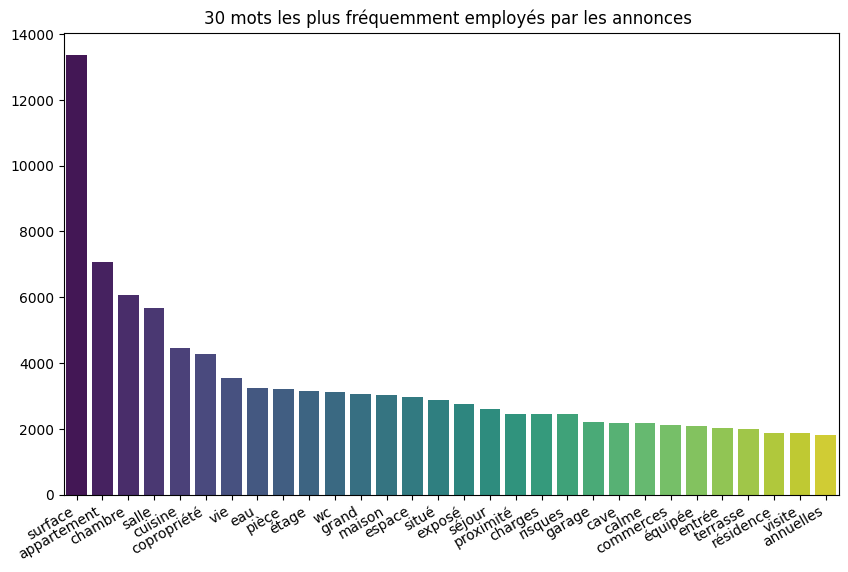

In [24]:
chaine = " ".join(df_immo_enrichi["Description_clean"])  

dico = Counter(chaine.split())
n=30

mots = [m[0] for m in dico.most_common(n)]
freq = [m[1] for m in dico.most_common(n)]

plt.figure(figsize= (10,6))
#sns.barplot(x=mots, y=freq)
sns.barplot(x=mots, y=freq, palette="viridis")

plt.xticks(rotation=30, ha="right")
plt.title('30 mots les plus fréquemment employés par les annonces ')


In [333]:
from collections import Counter

words = " ".join(df_immo_enrichi["Description_clean"]).split()
word_counts = Counter(words)
print(word_counts.most_common(30))

[('surface', 13375), ('appartement', 7067), ('chambre', 6079), ('salle', 5666), ('cuisine', 4472), ('copropriété', 4273), ('vie', 3552), ('eau', 3237), ('pièce', 3205), ('étage', 3139), ('wc', 3119), ('grand', 3069), ('maison', 3026), ('espace', 2961), ('situé', 2880), ('exposé', 2755), ('séjour', 2592), ('proximité', 2445), ('charges', 2438), ('risques', 2437), ('garage', 2212), ('cave', 2189), ('calme', 2171), ('commerces', 2117), ('équipée', 2096), ('entrée', 2033), ('terrasse', 1996), ('résidence', 1886), ('visite', 1878), ('annuelles', 1817)]


Transformation TFIdF


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix
from sklearn.preprocessing import StandardScaler
from scipy import sparse

In [26]:
#Features textuelles
tfidf = TfidfVectorizer(max_features=300, stop_words=list(stop_words))
X_text = tfidf.fit_transform(df_immo_enrichi["Description_clean"])

"""from sklearn.decomposition import TruncatedSVD

tfidf = TfidfVectorizer(max_features=1000, stop_words=list(stop_words))
X_text = tfidf.fit_transform(df_immo_enrichi["Description_clean"])

# SVD
svd = TruncatedSVD(n_components=50, random_state=42)
X_text = svd.fit_transform(X_text)  # 12 000 biens × 50 composantes#
"""

'from sklearn.decomposition import TruncatedSVD\n\ntfidf = TfidfVectorizer(max_features=1000, stop_words=list(stop_words))\nX_text = tfidf.fit_transform(df_immo_enrichi["Description_clean"])\n\n# SVD\nsvd = TruncatedSVD(n_components=50, random_state=42)\nX_text = svd.fit_transform(X_text)  # 12 000 biens × 50 composantes#\n'

In [27]:
#variables numeriques 

X_num = df_immo_enrichi[["Surface", "Pièces", "Chambres", "Prix_m2_commune"]].fillna(0)
X_num_scaled = StandardScaler().fit_transform(X_num)

X_num_sparse = csr_matrix(X_num_scaled)


In [28]:
#variable catégorielles

categorical_cols = ["etat_du_bien", "DPE", "travaux_a_prevoir", "Type_bien"]
df_cat = df_immo_enrichi[categorical_cols].fillna("inconnu")


# One-hot encoding
X_cat = pd.get_dummies(df_cat, drop_first=True)
X_cat_sparse = sparse.csr_matrix(X_cat.values)


In [29]:
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.sparse import csr_matrix, hstack

# 1Remplacer NaN par liste vide correctement
atouts_list = df_immo_enrichi["atouts"].apply(lambda x: x if isinstance(x, list) else [])

# MultiLabelBinarizer
mlb = MultiLabelBinarizer()
X_atouts = mlb.fit_transform(atouts_list)

# Sparse matrix
X_atouts_sparse = csr_matrix(X_atouts)
print(X_atouts_sparse.shape)

(4496, 4482)


In [30]:
#X_1 = hstack([X_text, X_num_sparse])
#X_final = hstack([X_1, X_cat_sparse])  

X_final = hstack([X_text, X_num_sparse,X_cat_sparse,X_atouts_sparse])


In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error

y = df_immo_enrichi["prix_m2"].dropna()

from scipy.sparse import csr_matrix
X_final = X_final.tocsr() 
X_final = X_final[:len(y)]

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
# ----------------------------
# 7Ridge avec GridSearchCV pour alpha
# ----------------------------
ridge = Ridge()
param_grid = {"alpha": [0.01, 0.1, 1.0, 10, 100]}
grid = GridSearchCV(ridge, param_grid, cv=5, scoring="r2")
grid.fit(X_train, y_train)

best_alpha = grid.best_params_["alpha"]
print("Meilleur alpha :", best_alpha)

# Entraînement final avec le meilleur alpha
model_ridge = Ridge(alpha=best_alpha)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)


Meilleur alpha : 10


In [33]:

#model_ridge = Ridge(alpha=1.0)
#model_ridge.fit(X_train, y_train)
#y_pred_ridge = model_ridge.predict(X_test)


mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
print(f"RMSE : {rmse:.2f}")

R2=model_ridge.score(X_test, y_test)
print(f"R2 : {R2:.2f}")

mae = mean_absolute_error(y_test, y_pred_ridge)
mape = mean_absolute_percentage_error(y_test, y_pred_ridge)
print(f"mae : {mae:.2f}")
print(f"mape : {mape:.2f}")


RMSE : 926.10
R2 : 0.56
mae : 615.70
mape : 0.16


In [34]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = model_rf.score(X_test, y_test)

print(f"RMSE : {rmse:.2f}")

print(f"R2 : {r2:.2f}")

mae = mean_absolute_error(y_test, y_pred_rf)
mape = mean_absolute_percentage_error(y_test, y_pred_rf)
print(f"mae : {mae:.2f}")
print(f"mape : {mape:.2f}")

RMSE : 941.04
R2 : 0.54
mae : 630.44
mape : 0.17


In [35]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2 = model_gb.score(X_test, y_test)

print(f"RMSE : {rmse:.2f}")

print(f"R2 : {r2:.2f}")

mae = mean_absolute_error(y_test, y_pred_gb)
mape = mean_absolute_percentage_error(y_test, y_pred_gb)
print(f"mae : {mae:.2f}")
print(f"mape : {mape:.2f}")


RMSE : 911.39
R2 : 0.57
mae : 599.20
mape : 0.16


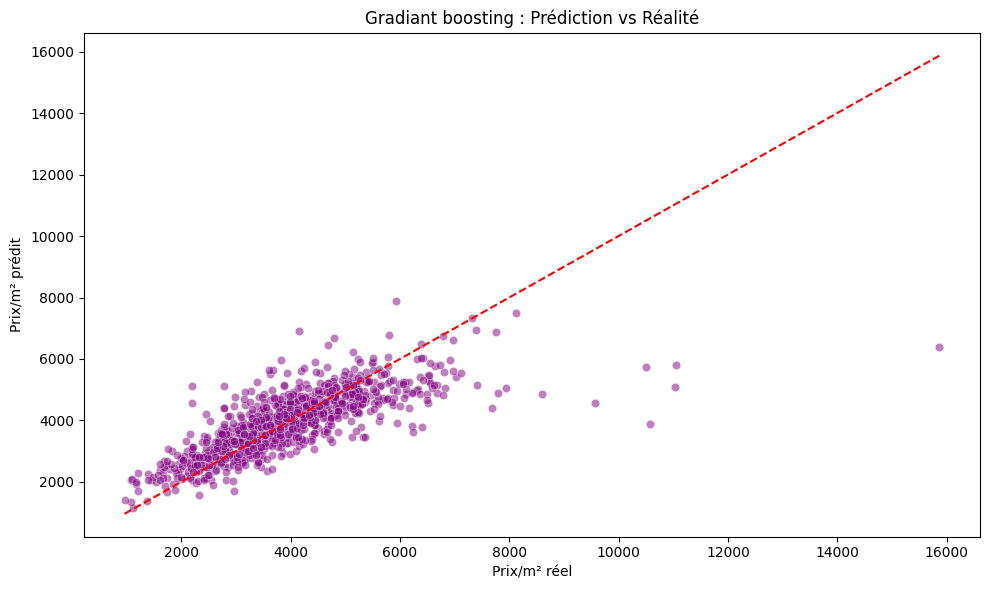

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Gradiant boosting : Prédiction vs Réalité")
plt.xlabel("Prix/m² réel")
plt.ylabel("Prix/m² prédit")
plt.tight_layout()
plt.show()


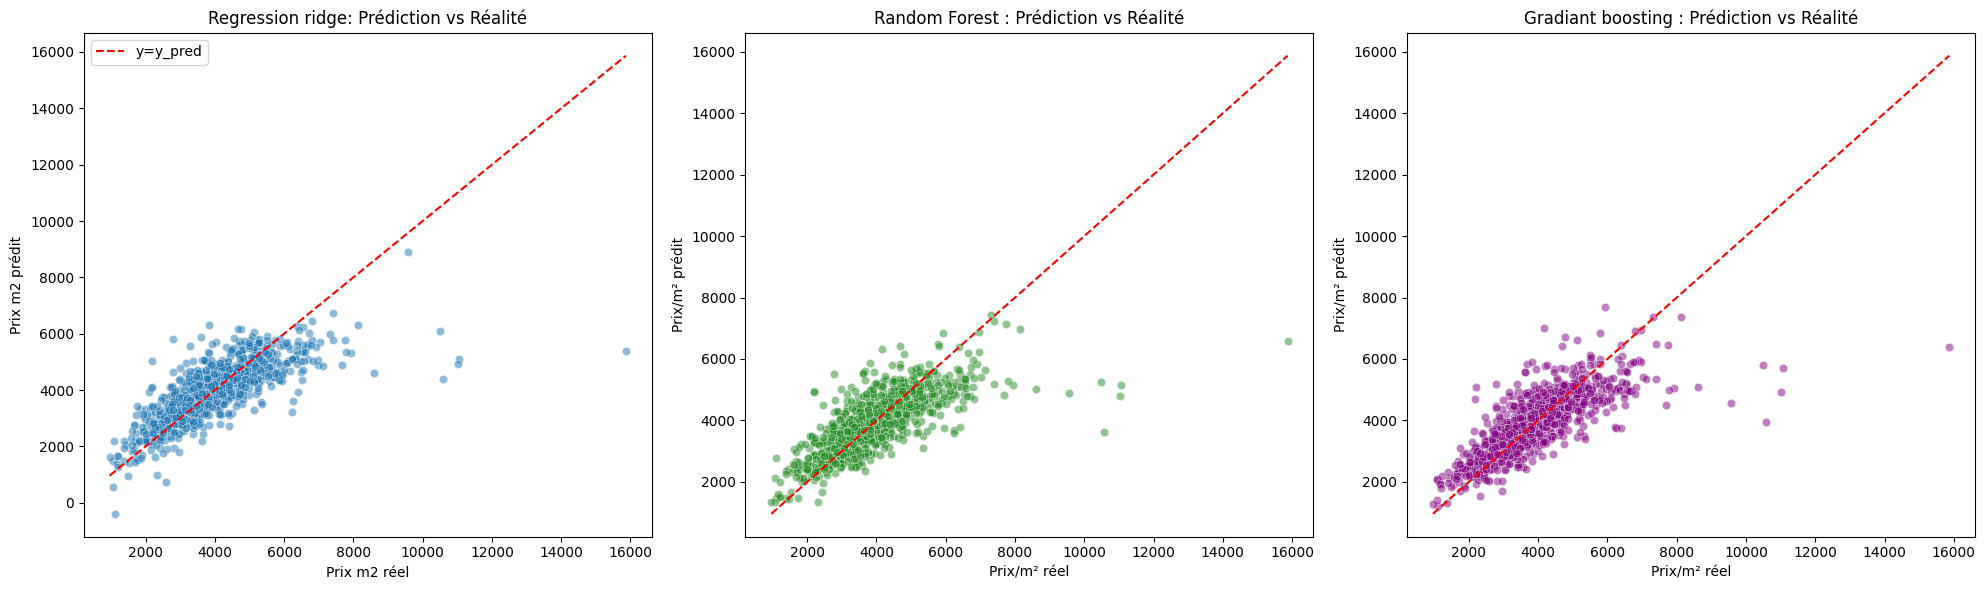

In [342]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)

sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.5)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="y=y_pred")
plt.xlabel("Prix m2 réel")
plt.ylabel("Prix m2 prédit")
plt.title("Regression ridge: Prédiction vs Réalité")
plt.legend()

# Graphe Random Forest
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest : Prédiction vs Réalité")
plt.xlabel("Prix/m² réel")
plt.ylabel("Prix/m² prédit")

# Graphe graniant boosting
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Gradiant boosting : Prédiction vs Réalité")
plt.xlabel("Prix/m² réel")
plt.ylabel("Prix/m² prédit")
plt.tight_layout()
plt.show()


In [130]:
importances = model_rf.feature_importances_
feature_names = tfidf.get_feature_names_out().tolist() + X_num.columns.tolist() + X_cat.columns.tolist()
importance_df = pd.DataFrame({"feature": feature_names, "importance": importances})
importance_df.sort_values("importance", ascending=False).head(20)

,feature,importance
303,Prix_m2_commune,0.517569
300,Surface,0.104032
257,terrasse,0.018119
305,etat_du_bien_neuf,0.014161
56,climat,0.012829
46,cave,0.007469
26,appartement,0.006972
25,années,0.005474
281,visite,0.005341
27,ascenseur,0.005243


In [44]:
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import mean_squared_error, r2_score

lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

params = {
    "objective": "regression",
    "metric": "rmse",
    "learning_rate": 0.01,
    "num_leaves": 31,
    "random_state": 42
}


gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=700,
    valid_sets=[lgb_train, lgb_eval],
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=50)
    ]
)
#gbm = lgb.train(params, lgb_train, num_boost_round=500, valid_sets=[lgb_train, lgb_eval],early_stopping_rounds=50, verbose_eval=50)

# --- Prédictions et métriques ---
y_pred_gb = gbm.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2 = r2_score(y_test, y_pred_gb)
mae = mean_absolute_error(y_test, y_pred_gb)
mape = mean_absolute_percentage_error(y_test, y_pred_gb)

print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.2f}")
print(f"mae : {mae:.2f}")
print(f"mape : {mape:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 53135
[LightGBM] [Info] Number of data points in the train set: 3596, number of used features: 446
[LightGBM] [Info] Start training from score 3958.934863
Training until validation scores don't improve for 50 rounds
[50]	training's rmse: 1065.51	valid_1's rmse: 1149.55
[100]	training's rmse: 908.376	valid_1's rmse: 1034.98
[150]	training's rmse: 816.708	valid_1's rmse: 984.44
[200]	training's rmse: 754.947	valid_1's rmse: 957.776
[250]	training's rmse: 706.762	valid_1's rmse: 940.155
[300]	training's rmse: 665.847	valid_1's rmse: 928.84
[350]	training's rmse: 631.514	valid_1's rmse: 921.094
[400]	training's rmse: 602.155	valid_1's rmse: 915.689
[450]	training's rmse: 576.595	valid_1's rmse: 912.264
[500]	training's rmse: 553.423	valid_1's rmse: 909.789
[550]	training's rmse: 532.883	valid_1's rmse:

Next step:
1) Prédire le prix du m2: 
   prix moyen par m2 de la commune
   surface
   localité
   type de bien
   embeding 
   bagofwords ou tfidf  pour les descriptions
2) faire un chatbot: je herche un appartement avec balcon et ...
  a) systèe similaire à du RAG
    vectorstores qui contient les embedding
    proche sémantiquement
    Attention les embedding ne marchent pas avec le type de filtre inférieure à 500k
       retriever par filtre
       filtres injectes par les llm (autoretriever)
   selfquery ret
3) construire un agent IA
    pour pouvoir retravailler les données 

In [7]:
df_immo_enrichi.dtypes

ID                             object
Titre                          object
Prix                          float64
Localisation                   object
Surface                       float64
Pièces                        float64
Chambres                      float64
DPE                            object
Description                    object
Date de publication            object
Agence                         object
Logo de l'agence               object
Images                         object
Lien annonce                   object
Lien page source               object
Caracteristiques               object
Date_publication       datetime64[ns]
prix_m2                       float64
Code_postal                    object
nb_char_description             int64
nb_mots_description             int64
Commune                        object
Prix_m2_commune               float64
travaux_a_prevoir                bool
etat_du_bien                   object
atouts                         object
dtype: objec

In [8]:
df_immo_enrichi.head()

,ID,Titre,Prix,Localisation,Surface,Pièces,Chambres,DPE,Description,Date de publication,...,Date_publication,prix_m2,Code_postal,nb_char_description,nb_mots_description,Commune,Prix_m2_commune,travaux_a_prevoir,etat_du_bien,atouts
0,xxuijv,Appartement • 77 m² • 4 pièces • 3 chambres,220000.0,Villeurbanne (69100),77.00,4.0,3.0,d,T4 Villeurbanne Perralière garage possible\nT4...,2025-02-10,...,2025-02-10,2857.142857,69100,1603,272,Villeurbanne,3977.100962,False,bon état,"[garage possible, balcon, cave, climatisation,..."
1,xy1hq1,Maison • 145 m² • 5 pièces • 4 chambres • Ter....,725000.0,Dommartin (69380),145.00,5.0,4.0,c,"Dommartin , à deux pas du golf de la Tour de S...",2025-03-08,...,2025-03-08,5000.000000,69380,842,158,Dommartin,5089.478951,False,bon état,"[climatisation, terrasse, piscine, jardin, ter..."
2,xxysg8,Appartement • 101 m² • 5 pièces,380000.0,Saint-Genis-Laval (69230),101.00,5.0,NaN,c,"Exclusivité ECOTRANSAC,\nVenez découvrir ce ma...",2025-02-27,...,2025-02-27,3762.376238,69230,1696,281,Saint-Genis-Laval,3677.087056,False,bon état,"[balcon, deux places de stationnements sécuris..."
3,xwmegh,Appartement • 63 m² • 3 pièces • 2 chambres,250000.0,Lyon 8ème (69008),63.00,3.0,2.0,d,*** OFFRE ACCEPTÉE ***\n69008 LYON - T3 DE 63 ...,2024-09-05,...,2024-09-05,3968.253968,69008,2463,419,Lyon 8ème,4133.356332,False,bon état,"[dernier étage, traversant, lumineux, cuisine ..."
4,xx813q,"Appartement • 67,41 m² • 3 pièces • 2 chambres",270000.0,Lyon 3ème (69003),67.41,3.0,2.0,e,LIMMO vous propose à la vente cet appartement ...,2024-11-20,...,2024-11-20,4005.340454,69003,731,116,Lyon 3ème,4705.451132,False,neuf,"[cuisine équipée, placard, proximité commodités]"


https://www.data.gouv.fr/datasets/base-officielle-des-codes-postaux/

latitude     22
longitude    22
dtype: int64


True

# Chatbot

In [100]:
from langchain.schema import Document
from tqdm import tqdm


In [101]:
metadata_cols = ["Prix", "prix_m2",  "Surface", "etat_du_bien",  "Pièces", "Chambres",  "Commune",  'Code_postal', 'Titre','Lien annonce', 'Type_bien','atouts','travaux_a_prevoir','latitude', 'longitude']
#date publication?

"""docs = [
    Document(
        page_content=row["Description"],
        metadata={col: row[col] for col in metadata_cols if pd.notnull(row.get(col))}
    )
    for _, row in tqdm(df_immo_enrichi.iterrows())
]"""

docs = [
    Document(
        page_content=row["Description"],
        metadata={
            col: (", ".join(row[col]) if isinstance(row[col], (list, tuple, pd.Series, np.ndarray)) else row[col])
            for col in metadata_cols
            if row[col] is not None and (not isinstance(row[col], (np.ndarray, pd.Series)) or len(row[col]) > 0)
        }
    )
    for _, row in tqdm(df_immo_enrichi.iterrows())
]


0it [00:00, ?it/s]

4496it [00:01, 3699.58it/s]


In [102]:
docs[0]


Document(metadata={'Prix': 220000.0, 'prix_m2': 2857.1428571428573, 'Surface': 77.0, 'etat_du_bien': 'bon état', 'Pièces': 4.0, 'Chambres': 3.0, 'Commune': 'Villeurbanne', 'Code_postal': '69100', 'Titre': 'Appartement • 77\xa0m² • 4\xa0pièces • 3\xa0chambres', 'Lien annonce': 'https://www.superimmo.com/annonces/achat-appartement-77m-villeurbanne-69100-xxuijv', 'Type_bien': 'Appartement', 'atouts': 'garage possible, balcon, cave, climatisation, parc avec terrain de tennis, pistes cyclables', 'travaux_a_prevoir': False, 'latitude': 45.77187866028393, 'longitude': 4.889827189332388}, page_content="T4 Villeurbanne Perralière garage possible\nT4 74m² Villeurbanne\nJe vous propose en exclusivité cet appartement :\nIl se compose d'une entrée, d'un séjour, d'une cuisine, 3 chambres, une salle de bain et des toilettes. toutes les pièces à part la cuisine donnent sur le balcon filant. L'appartement est entièrement climatisé.\nune cave complète l'appartement et un garage box en sous-sol est possi

In [103]:
from langchain_openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma
import random

embedding_model = OpenAIEmbeddings(
    model="text-embedding-3-small", api_key=api_key, chunk_size=500)



In [19]:

vectorstore = Chroma.from_documents(  docs, embedding_model, collection_name=f"chroma_annonces_{random.random()}")
#Recherche naive

retriever = vectorstore.as_retriever(search_kwargs={"k": 3})

query = "Je cherche un appartement 2 pièces"

# Appliquer la recherche sans filtre
results = retriever.invoke(query)

# Afficher les documents les plus proches
for i, doc in enumerate(results, 1):
    print(f"\n--- Résultat {i} ---")
    print(f"{doc.page_content}...")
    print(doc.metadata)


--- Résultat 1 ---
Charmant appartement de type T2 situé au 3ᵉ étage d'une résidence calme et sécurisée. Il se compose d'une spacieuse pièce de vie lumineuse avec un coin cuisine fonctionnel, ainsi qu'un espace bureau en mezzanine, idéal pour le télétravail ou le rangement.
À l'étage supérieur, vous découvrirez une belle chambre mansardée offrant un espace cosy, accompagnée d'une salle de bain avec WC.
Cet appartement allie confort et fonctionnalité, parfait pour une personne seule ou un couple à la recherche d'un cadre de vie agréable.
L'appartement est vendu avec un bail en cours pour un montant mensuel de 633 €.
Référence agence : 500...
{'Commune': 'Lyon 4ème', 'Code_postal': '69004', 'Chambres': 1.0, 'Prix': 185000.0, 'Surface': 24.0, 'prix_m2': 7708.333333333333, 'etat_du_bien': 'bon état', 'Pièces': 2.0}

--- Résultat 2 ---
DV Immobilier By Groupe CSIM vous propose à la location un appartement T2 idéal pour une personne seule, un couple ou un jeune actif. Situé au 92 rue Pierre

a) Champs filtrables et affichables (métadonnées)
Nom	Type	Description	Notes
Titre	string	Titre de l’annonce	Affichage dans popup Folium
Prix	float	Prix en €	Filtrage par budget
Surface	float	Surface en m²	Filtrage par taille
Pièces	float	Nombre de pièces	Filtrage
Chambres	float	Nombre de chambres	Filtrage précis
Commune	string	Ville ou commune	Filtrage géographique
Code_postal	string	Code postal	Filtrage géographique
latitude	float	Latitude du bien	Carte Folium
longitude	float	Longitude du bien	Carte Folium
Lien annonce	string	URL de l’annonce	Popup / ouverture dans navigateur
prix_m2	float	Prix au m²	Optionnel, pour filtres avancés
etat_du_bien	string	Etat général	Exemple : "bon état", "travaux à prévoir"
travaux_a_prevoir	bool	Booléen pour filtrer facilement	Dérivé de etat_du_bien ou Caracteristiques
jardin	bool	Booléen dérivé de Caracteristiques ou Description	Pour filtrer rapidement les biens avec jardin

In [104]:
from langchain.chains.query_constructor.schema import AttributeInfo


metadata_field_info = [
    AttributeInfo(name="Prix", description="Prix du bien immobilier en euros", type="float"),
    AttributeInfo(name="Surface", description="Surface totale du bien en m", type="float"),
    AttributeInfo(name="Pièces", description="Nombre de pièces", type="float"),
    AttributeInfo(name="Chambres", description="Nombre de chambres", type="float"),
    AttributeInfo(name="Commune", description="Ville ou commune où se situe le bien", type="string"),
    AttributeInfo(name="Code_postal", description="Code postal du bien", type="string"),
    AttributeInfo(name="Lien annonce", description="URL de l'annonce", type="string"),
    AttributeInfo(name="prix_m2", description="Prix du mètre carré du bien en euros", type="float"),
    AttributeInfo(name="etat_du_bien", description="État général du bien: neuf, bon état, etc", type="string"),
    AttributeInfo(name="Type_bien", description="Type  du bien: appartement ou maison", type="string"),
    AttributeInfo(name="travaux_a_prevoir", description="Indique si des travaux sont à prévoir", type="boolean"),
   # AttributeInfo(name="atouts", description="les principaux atouts du bien", type="string"),
    AttributeInfo(name="Titre", description="Titre de l'annonce", type="string"),
    AttributeInfo(name="latitude", description="Latitude géographique", type="float"),
    AttributeInfo(name="longitude", description="Longitude géographique", type="float"),
]

In [17]:
from langchain.retrievers.self_query.base import SelfQueryRetriever
from langchain_openai import ChatOpenAI

# Initialisation du modèle de langage
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0, api_key=api_key)

# SelfQueryRetriever
retriever_immo = SelfQueryRetriever.from_llm(
    llm=llm,
    vectorstore=vectorstore,
    document_contents="Annonces immobilières",
    metadata_field_info=metadata_field_info,
    verbose=True,
)


In [18]:

docss = retriever_immo.invoke("Je cherche un appartement avec jardin avec au moins 3 pièces et un budget entre 100 000€ et 350 000 €")
for doc in docss:
    print(doc.page_content)
    print(doc.metadata)
    print("------\n")

CHAPONNAY, Magnifique appartement avec jardin, dans un état irréprochable, comprenant séjour avec cuisine US équipée, 2 chambres, salle d'eau et 2 WC, terrasse au calme donnant sur un jardinet bien aménagé, chauffage individuel par le sol, petite copro, faibles charges de 250€/an, place de stationnement privative. Pour plus de renseignements contacter Nicolas GALLIEN 06x12x73x86x48
 Les informations sur les risques auxquels ce bien est exposé sont disponibles sur le site Géorisques : www.georisques.gouv.fr
{'prix_m2': 4561.115668580804, 'Commune': 'Chaponnay', 'Prix': 278000.0, 'Chambres': 2.0, 'Surface': 60.95, 'etat_du_bien': 'bon état', 'Code_postal': '69970', 'Pièces': 3.0}
------

Type 3 en duplex avec jardin
Votre agence immobilière LES CLÉS D'ALEXIA vous invite à découvrir ce joli appartement de type 3, en duplex, offrant une atmosphère chaleureuse avec sa pièce à vivre traversante et sa cuisine américaine équipée.
A l'étage vous retrouverez les deux chambres spacieuses, accompa

In [22]:
for doc in docss:
    print(doc.page_content)
    print(doc.metadata)s
    print("------\n")

CHAPONNAY, Magnifique appartement avec jardin, dans un état irréprochable, comprenant séjour avec cuisine US équipée, 2 chambres, salle d'eau et 2 WC, terrasse au calme donnant sur un jardinet bien aménagé, chauffage individuel par le sol, petite copro, faibles charges de 250€/an, place de stationnement privative. Pour plus de renseignements contacter Nicolas GALLIEN 06x12x73x86x48
 Les informations sur les risques auxquels ce bien est exposé sont disponibles sur le site Géorisques : www.georisques.gouv.fr
{'prix_m2': 4561.115668580804, 'Commune': 'Chaponnay', 'Prix': 278000.0, 'Chambres': 2.0, 'Surface': 60.95, 'etat_du_bien': 'bon état', 'Code_postal': '69970', 'Pièces': 3.0}
------

Type 3 en duplex avec jardin
Votre agence immobilière LES CLÉS D'ALEXIA vous invite à découvrir ce joli appartement de type 3, en duplex, offrant une atmosphère chaleureuse avec sa pièce à vivre traversante et sa cuisine américaine équipée.
A l'étage vous retrouverez les deux chambres spacieuses, accompa

# Passage à Qdrant

In [ ]:
#docker run -d --name qdrant -p 6333:6333  -p 6334:6334  qdrant/qdrant
#docker start qdrant

In [109]:
from langchain_community.vectorstores import Qdrant
from langchain_community.embeddings import OpenAIEmbeddings
from qdrant_client import QdrantClient
from langchain.retrievers.self_query.qdrant import QdrantTranslator


In [110]:
# Connexion au serveur Qdrant local
client = QdrantClient(url="http://localhost:6333")
#client = QdrantClient(url="http://localhost:6333", timeout=60)


In [111]:
docs[4400]

Document(metadata={'Prix': 157000.0, 'prix_m2': 2473.219911783239, 'Surface': 63.48, 'etat_du_bien': 'bon état', 'Pièces': 3.0, 'Chambres': 2.0, 'Commune': 'Lyon 5ème', 'Code_postal': '69005', 'Titre': 'Appartement • 63,48\xa0m² • 3\xa0pièces • 2\xa0chambres', 'Lien annonce': 'https://www.superimmo.com/annonces/achat-appartement-63m-lyon-5eme-69005-xxnbv7', 'Type_bien': 'Appartement', 'atouts': "cave, emplacements de stationnement, logement loué, box fermé (possibilité d'achat)", 'travaux_a_prevoir': False, 'latitude': 45.75602914260185, 'longitude': 4.801174763110998}, page_content="POUR INVESTISSEUR, T3 déjà loué, à VENDRE, angle Commandant Charcot et Rue François Génin à LYON 05.\n 1er étage, dans copropriété fermée et sécurisée. Traversant, lumineux, sans vis-à-vis comprenant un séjour de 25m2, une cuisine séparée (mobilier ancien mais en bon état), deux  chambres avec placard, une salle de bains, un wc séparé.\n Une cave, nombreux emplacements de stationnement dans la résidence. L

In [112]:
client.get_collections()


CollectionsResponse(collections=[])

In [115]:

# Création / connexion à une collection Qdrant
'''vectorstore_q = Qdrant(
    client=client,
    collection_name="Annonces_Immobilieres",
    embeddings=embedding_model
)'''



vectorstore_q = Qdrant.from_documents(
    documents=docs,
    embedding=embedding_model,
    url="http://127.0.0.1:6333",
    collection_name="Annonces_Immobilieres",
    force_recreate=True  # recrée la collection si elle existait
)

In [57]:
#from qdrant_client import QdrantClient

#client = QdrantClient(url="http://localhost:6333")

/var/folders/c9/zy5ldbcx3t9gz5mz6yb9kp540000gp/T/ipykernel_2070/1537047282.py:3: UserWarning: Failed to obtain server version. Unable to check client-server compatibility. Set check_compatibility=False to skip version check.
  client = QdrantClient(url="http://localhost:6333")


In [116]:
point = client.scroll(
    collection_name="Annonces_Immobilieres",  # nom exact de ta collection
    limit=1,
    timeout=60 
)

print(point)

([Record(id='0005f274-cd76-4692-bb48-7ff2b43720cc', payload={'page_content': "A proximité immédiate du centre, maison ancienne T4 de 86 m2 entièrement rénovée en 2022 sur un terrain clos de 400 m2. Luminosité et espace pour cette maison à l'esprit contemporain  offrant au rez-de-chaussée un salon avec grande baie vitrée ouvert sur la terrasse, une cuisine aménagée et équipée, une salle d'eau, un wc. A l'étage, trois chambres, une salle de bains avec wc. Huisseries double vitrage. Climatisation réversible et radiateurs électriques. Rangements. Terrasse. Panneaux photovoltaïques. Les honoraires sont à la charge du vendeur.", 'metadata': {'Prix': 419000.0, 'prix_m2': 4872.093023255814, 'Surface': 86.0, 'etat_du_bien': 'neuf', 'Pièces': 4.0, 'Chambres': 3.0, 'Commune': 'Vourles', 'Code_postal': '69390', 'Titre': 'Maison • 86\xa0m² • 4\xa0pièces • 3\xa0chambres • Ter.\xa0400\xa0m²', 'Lien annonce': 'https://www.superimmo.com/annonces/achat-maison-86m-vourles-69390-xxwjcl', 'Type_bien': 'Mai

In [117]:
from langchain.retrievers.self_query.base import SelfQueryRetriever
from langchain_openai import ChatOpenAI

# Initialisation du modèle de langage
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0, api_key=api_key)
#traducteur spécifique pour Qdrant
translator = QdrantTranslator(metadata_key="metadata")  # ou "payload"


# SelfQueryRetriever
retriever_immo2 = SelfQueryRetriever.from_llm(
    llm=llm,
    vectorstore=vectorstore_q,
    document_contents="Annonces immobilières",
    metadata_field_info=metadata_field_info,
    structured_query_translator=translator,
    verbose=True,
)




In [118]:
#query = "Trouve-moi un appartement à Chaponnay avec 2 chambres et un prix inférieur à 200000€"
query = "Je cherche un appartement avec jardin avec au moins 3 pièces et un budget entre 100 000€ et 350 000 €"
docs_result = retriever_immo2.get_relevant_documents(query)

for doc in docs_result:
    print(doc.page_content)
    print(doc.metadata)

/var/folders/c9/zy5ldbcx3t9gz5mz6yb9kp540000gp/T/ipykernel_2070/2095287677.py:3: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs_result = retriever_immo2.get_relevant_documents(query)


CHAPONNAY, Magnifique appartement avec jardin, dans un état irréprochable, comprenant séjour avec cuisine US équipée, 2 chambres, salle d'eau et 2 WC, terrasse au calme donnant sur un jardinet bien aménagé, chauffage individuel par le sol, petite copro, faibles charges de 250€/an, place de stationnement privative. Pour plus de renseignements contacter Nicolas GALLIEN 06x12x73x86x48
 Les informations sur les risques auxquels ce bien est exposé sont disponibles sur le site Géorisques : www.georisques.gouv.fr
{'Prix': 278000.0, 'prix_m2': 4561.115668580804, 'Surface': 60.95, 'etat_du_bien': 'bon état', 'Pièces': 3.0, 'Chambres': 2.0, 'Commune': 'Chaponnay', 'Code_postal': '69970', 'Titre': 'Appartement • 60,95\xa0m² • 3\xa0pièces • 2\xa0chambres', 'Lien annonce': 'https://www.superimmo.com/annonces/achat-appartement-60m-chaponnay-69970-xxzx5w', 'Type_bien': 'Appartement', 'atouts': 'jardin, terrasse, place de stationnement privative', 'travaux_a_prevoir': False, 'latitude': 45.62817097231

In [381]:
query = "Trouve-moi un appartement à Chaponnay et un prix inférieur à 300000€ avec chambres>1"
docs_result = retriever_immo2.get_relevant_documents(query)

for doc in docs_result:
    print(doc.page_content)
    print(doc.metadata)

CHAPONNAY, Magnifique appartement avec jardin, dans un état irréprochable, comprenant séjour avec cuisine US équipée, 2 chambres, salle d'eau et 2 WC, terrasse au calme donnant sur un jardinet bien aménagé, chauffage individuel par le sol, petite copro, faibles charges de 250€/an, place de stationnement privative. Pour plus de renseignements contacter Nicolas GALLIEN 06x12x73x86x48
 Les informations sur les risques auxquels ce bien est exposé sont disponibles sur le site Géorisques : www.georisques.gouv.fr
{'Prix': 278000.0, 'prix_m2': 4561.115668580804, 'Surface': 60.95, 'etat_du_bien': 'bon état', 'Pièces': 3.0, 'Chambres': 2.0, 'Commune': 'Chaponnay', 'Code_postal': '69970', 'Titre': 'Appartement • 60,95\xa0m² • 3\xa0pièces • 2\xa0chambres', 'Lien annonce': 'https://www.superimmo.com/annonces/achat-appartement-60m-chaponnay-69970-xxzx5w', 'Type_bien': 'Appartement', 'atouts': 'jardin, terrasse, place de stationnement privative', 'travaux_a_prevoir': False, 'latitude': 45.62817097231

CHAPONNAY, Magnifique appartement avec jardin, dans un état irréprochable, comprenant séjour avec cuisine US équipée, 2 chambres, salle d'eau et 2 WC, terrasse au calme donnant sur un jardinet bien aménagé, chauffage individuel par le sol, petite copro, faibles charges de 250€/an, place de stationnement privative. Pour plus de renseignements contacter Nicolas GALLIEN 06x12x73x86x48
 Les informations sur les risques auxquels ce bien est exposé sont disponibles sur le site Géorisques : www.georisques.gouv.fr
{'Prix': 278000.0, 'prix_m2': 4561.115668580804, 'Surface': 60.95, 'etat_du_bien': 'bon état', 'Pièces': 3.0, 'Chambres': 2.0, 'Commune': 'Chaponnay', 'Code_postal': '69970', 'Titre': 'Appartement • 60,95\xa0m² • 3\xa0pièces • 2\xa0chambres', 'Lien annonce': 'https://www.superimmo.com/annonces/achat-appartement-60m-chaponnay-69970-xxzx5w', 'Type_bien': 'Appartement', 'atouts': 'jardin, terrasse, place de stationnement privative', 'travaux_a_prevoir': False, 'latitude': 45.62817097231

In [376]:
query = "Trouve-moi un appartement à Chaponnay et un prix inférieur à 300000€ avec chambres>1"
docs_result = retriever_immo2.get_relevant_documents(query)

for doc in docs_result:
    print(doc.page_content)
    print(doc.metadata)

In [125]:
query = "Trouve un appartement à Chaponnay avec 2 chambres et un prix inférieur à 300000€ et sans jardin"
docs_result = retriever_immo.get_relevant_documents(query)
for doc in docs_result:
    print(doc.page_content)
    print(doc.metadata)
    print("------\n")

NameError: name 'retriever_immo' is not defined

# Agent


In [119]:
 

import os


os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = langsmith_key
os.environ["LANGCHAIN_PROJECT"] = "Immo-Project"

In [120]:
from langchain.callbacks import LangChainTracer
tracer = LangChainTracer(project_name="Immo-Project")


In [121]:
import folium
from folium.plugins import MarkerCluster
import webbrowser
from langchain.agents import initialize_agent, Tool, AgentType
from langchain_openai import ChatOpenAI
from langchain.agents import Tool


In [122]:



def display_map_tool(query: str):
    """
    Recherche des annonces et génère une carte interactive Folium.
    Les annonces sont affichées en markers avec popup contenant les informations principales et le lien.
    """
    docs = retriever_immo2.get_relevant_documents(query)
    if not docs:
        return "⚠️ Aucune annonce à afficher sur la carte."
    
    latitudes = [doc.metadata['latitude'] for doc in docs if doc.metadata.get('latitude')]
    longitudes = [doc.metadata['longitude'] for doc in docs if doc.metadata.get('longitude')]
    
    if not latitudes or not longitudes:
        return "⚠️ Pas de coordonnées disponibles."
    
    centre_lat = sum(latitudes)/len(latitudes)
    centre_lon = sum(longitudes)/len(longitudes)
    
    carte = folium.Map(location=[centre_lat, centre_lon], zoom_start=12)
    marker_cluster = MarkerCluster().add_to(carte)
    
    for doc in docs:
        meta = doc.metadata
        if meta.get('latitude') and meta.get('longitude'):
            popup = f"{meta.get('Titre','Annonce')} - {meta.get('Prix','N/A')} €"
            folium.Marker([meta['latitude'], meta['longitude']], popup=popup).add_to(marker_cluster)
    
    file_path = os.path.abspath("carte_resultats.html")
    carte.save(file_path)
    webbrowser.open(f"file://{file_path}")
    
    return f"Carte générée et ouverte : {file_path}"

map_tool = Tool(
    name="Affichercarte",
    description="Crée une carte géographique des annonces et l'affiche dans le navigateur",
    func=display_map_tool
)

In [123]:

def summarize_tool(query: str):
    """
    Résume les annonces trouvées pour la requête donnée.
    Utilise les métadonnées (titre, prix, surface, pièces, chambres, atouts, lien) pour générer un résumé concis.
    """
    docs = retriever_immo2.get_relevant_documents(query)
    if not docs:
        return "⚠️ Aucune annonce trouvée pour cette requête."
    annonces_text = "\n\n".join(
        f"Titre: {doc.metadata.get('Titre')}\n"
        f"Prix: {doc.metadata.get('Prix','N/A')} €\n"
        f"Surface: {doc.metadata.get('Surface','N/A')} m²\n"
        f"Pièces: {doc.metadata.get('Pièces','N/A')}\n"
        f"Chambres: {doc.metadata.get('Chambres','N/A')}\n"
        f"Commune: {doc.metadata.get('Commune','N/A')}\n"
        f"Atouts: {doc.metadata.get('atout','N/A')}\n"
        f"Lien: {doc.metadata.get('Lien annonce','#')}"
        for doc in docs
    )

    # Appel au LLM pour générer un résumé fluide
    prompt = (
        f"Voici une liste d'annonces immobilières trouvées pour la requête : '{query}'.\n"
        "Résume-les de façon claire et concise pour un utilisateur, "
        "en mettant en avant les points clés (prix, surface, localisation, état, atouts).\n\n"
        f"Annonces :\n{annonces_text}"
    )
    response = llm.invoke(prompt)
    return response.content


summary_tool = Tool(
    name="Resumer_annonces",
    description="Résume les annonces trouvées de manière naturelle et lisible par un humain",
    func=summarize_tool
)

In [124]:
# Tool 3 : Export CSV
def export_csv_tool(query: str):
    """
    Exporte les annonces trouvées pour la requête donnée vers un fichier CSV.
    Renvoie le chemin du fichier généré ou un message si aucune annonce trouvée.
    """
    docs = retriever_immo2.get_relevant_documents(query)
    if not docs:
        return "⚠️ Aucune annonce à exporter."
    df = pd.DataFrame([doc.metadata for doc in docs])
    file_path = os.path.abspath("annonces_export.csv")
    df.to_csv(file_path, index=False)
    return f"CSV généré : {file_path}"

csv_tool = Tool(
    name="Exporter_CSV",
    description="Exporte les annonces trouvées vers un fichier CSV",
    func=export_csv_tool
)


In [136]:
'''from langchain.utilities import GooglePlacesAPIWrapper

google_places = GooglePlacesAPIWrapper(api_key="TA_CLE_GOOGLE")

def find_nearby_places(query, location, radius=1000):
    results = google_places.nearby_search(query=query, location=location, radius=radius)
    return results

google_places_tool = Tool(
    name="GooglePlaces",
    description="Retourne les lieux proches d'une localisation pour enrichir les annonces",
    func=find_nearby_places
)
'''

'from langchain.utilities import GooglePlacesAPIWrapper\n\ngoogle_places = GooglePlacesAPIWrapper(api_key="TA_CLE_GOOGLE")\n\ndef find_nearby_places(query, location, radius=1000):\n    results = google_places.nearby_search(query=query, location=location, radius=radius)\n    return results\n\ngoogle_places_tool = Tool(\n    name="GooglePlaces",\n    description="Retourne les lieux proches d\'une localisation pour enrichir les annonces",\n    func=find_nearby_places\n)\n'

In [126]:
#from langgraph.prebuilt import create_react_agent
from langgraph.prebuilt import create_react_agent

#llm = ChatOpenAI(model="gpt-4o-mini", temperature=0, api_key=api_key)
llm = ChatOpenAI(  model="gpt-4o-mini",  temperature=0, api_key=api_key, callbacks=[tracer], verbose=True)

# --- Création de l’agent ---
tools = [csv_tool, summary_tool, map_tool]
agent = create_react_agent(llm, tools)




In [148]:
# --- Test ---
query1 = "Fais-moi un résumé des appartements à Lyon avec balcon à moins de 300000eurso"
query2 = "Exporte-moi les maisons à Chaponnay avec terasse"
query3 = "Génère une carte des biens immobiliers à Villeurbanne"
query4="Montre-moi les appartements avec une école à moins de 500 m et un parc à proximité."
query5="Affiche moi sur une carte les appartements avec jardin à moins de 300 000 €, et je veux aussi un résumé et l'export sous format CSV"


In [138]:
result=agent.invoke({"messages": [("user", query1)]})

In [139]:
result

{'messages': [HumanMessage(content='Fais-moi un résumé des appartements à Lyon avec balcon à moins de 300000eurso', additional_kwargs={}, response_metadata={}, id='d7799227-2416-4909-aa41-91be82bb3be2'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_7wkzGN15a7yZHrkgljoiZ1Ap', 'function': {'arguments': '{"__arg1":"appartements à Lyon avec balcon à moins de 300000 euros"}', 'name': 'Resumer_annonces'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 154, 'total_tokens': 185, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CBPeWw4tOs0BRhkUzJBpAjWEYwF7w', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--0ec71a71-

In [140]:
ai_content = None
for msg in result['messages']:
    if getattr(msg, "name", None) == "Resumer_annonces":
        ai_content = msg.content
        break

# Affichage lisible dans le notebook
from IPython.display import display, Markdown
if ai_content:
    display(Markdown(ai_content))
else:
    print("⚠️ Pas de résumé trouvé")

Voici un résumé des annonces d'appartements à Lyon avec balcon, disponibles à moins de 300 000 euros :

1. **Lyon 2ème**
   - **Prix**: 270 000 €
   - **Surface**: 46 m²
   - **Pièces**: 2 (1 chambre)
   - **Lien**: [Voir l'annonce](https://www.superimmo.com/annonces/achat-appartement-46m-lyon-2eme-69002-xxy6lp)

2. **Lyon 1er**
   - **Prix**: 275 000 €
   - **Surface**: 35 m²
   - **Pièces**: 2 (1 chambre)
   - **Lien**: [Voir l'annonce](https://www.superimmo.com/annonces/achat-appartement-35m-lyon-1er-69001-xxodze)

3. **Lyon 9ème**
   - **Prix**: 220 000 €
   - **Surface**: 70 m²
   - **Pièces**: 4 (3 chambres)
   - **Lien**: [Voir l'annonce](https://www.superimmo.com/annonces/achat-appartement-70m-lyon-9eme-69009-xxzb3b)

4. **Lyon 3ème**
   - **Prix**: 245 000 €
   - **Surface**: 68 m²
   - **Pièces**: 2 (1 chambre)
   - **Lien**: [Voir l'annonce](https://www.superimmo.com/annonces/achat-appartement-68m-lyon-3eme-69003-xxzmcm)

Ces appartements offrent une variété de surfaces et de configurations, allant de 35 m² à 70 m², avec des prix compétitifs.

In [149]:
result2=agent.invoke({"messages": [("user", query2)]})

In [150]:
result2


{'messages': [HumanMessage(content='Exporte-moi les maisons à Chaponnay avec terasse', additional_kwargs={}, response_metadata={}, id='e6a150b0-9285-434a-a6c6-4a014d60b3ba'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_L2qJt8dmJ6tuQTNcG415VLtc', 'function': {'arguments': '{"__arg1":"maisons à Chaponnay avec terrasse"}', 'name': 'Exporter_CSV'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 147, 'total_tokens': 172, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CBPjcxXaLd8EJUG8OTuKgi2fAeYJT', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--28e23af7-804d-4509-b628-7627fcff14fa-0', tool_calls=[{'name': 'E

In [146]:
result3=agent.invoke({"messages": [("user", query3)]})

In [402]:
agent.invoke({"messages": [("user", query4)]})

{'messages': [HumanMessage(content='Montre-moi les appartements avec une école à moins de 500\u202fm et un parc à proximité.', additional_kwargs={}, response_metadata={}, id='fdc16126-8685-4d22-a138-69e6122690e8'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_JYYrtsS81hWRfq3Fzd5fB13S', 'function': {'arguments': '{"__arg1":"appartements avec une école à moins de 500 m et un parc à proximité"}', 'name': 'Resumer_annonces'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 34, 'prompt_tokens': 156, 'total_tokens': 190, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-C8rSDnmhObxbJQh1E1zzR7DC2WVTv', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': No

In [147]:
result5=agent.invoke({"messages": [("user", query5)]})

In [406]:
ai_content = None
for msg in result5['messages']:
    if getattr(msg, "name", None) == "Resumer_annonces":
        ai_content = msg.content
        break

# Affichage lisible dans le notebook
from IPython.display import display, Markdown
if ai_content:
    display(Markdown(ai_content))
else:
    print("⚠️ Pas de résumé trouvé")

Voici un résumé des annonces d'appartements avec jardin à moins de 300 000 € :

1. **Chaponnay**
   - **Prix**: 278 000 €
   - **Surface**: 60,95 m²
   - **Pièces**: 3 (2 chambres)
   - **État**: N/A
   - **Atouts**: N/A
   - **Lien**: [Voir l'annonce](https://www.superimmo.com/annonces/achat-appartement-60m-chaponnay-69970-xxzx5w)

2. **Echalas**
   - **Prix**: 208 000 €
   - **Surface**: 54,75 m²
   - **Pièces**: 3 (2 chambres)
   - **État**: N/A
   - **Atouts**: N/A
   - **Lien**: [Voir l'annonce](https://www.superimmo.com/annonces/achat-appartement-54m-echalas-69700-xu2xgc)

3. **Mions**
   - **Prix**: 179 000 €
   - **Surface**: 62 m²
   - **Pièces**: 2 (1 chambre)
   - **État**: N/A
   - **Atouts**: N/A
   - **Lien**: [Voir l'annonce](https://www.superimmo.com/annonces/achat-appartement-62m-mions-69780-xxu716)

4. **Rillieux-la-Pape**
   - **Prix**: 188 000 €
   - **Surface**: 60 m²
   - **Pièces**: 3 (2 chambres)
   - **État**: N/A
   - **Atouts**: N/A
   - **Lien**: [Voir l'annonce](https://www.superimmo.com/annonces/achat-appartement-60m-rillieux-la-pape-69140-xupxub)

Ces appartements offrent des options variées en termes de prix et de surface, tous situés dans des communes proches.

# Evaluation avec RAGAS

In [ ]:
# Tool 3 : Export CSV
def export_csv_tool(query: str):
    """
    Exporte les annonces trouvées pour la requête donnée vers un fichier CSV.
    Renvoie le chemin du fichier généré ou un message si aucune annonce trouvée.
    """
    docs = retriever_immo2.get_relevant_documents(query)
    if not docs:
        return "⚠️ Aucune annonce à exporter."
    df = pd.DataFrame([doc.metadata for doc in docs])
    file_path = os.path.abspath("annonces_export.csv")
    df.to_csv(file_path, index=False)
    return f"CSV généré : {file_path}"

csv_tool = Tool(
    name="Exporter_CSV",
    description="Exporte les annonces trouvées vers un fichier CSV",
    func=export_csv_tool
)


In [146]:
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

# LLM pour générer les questions
generator_llm = LangchainLLMWrapper(
    ChatOpenAI(model="gpt-4o-mini", temperature=0, api_key=api_key)
)

# Embeddings pour la similarité
generator_embeddings = LangchainEmbeddingsWrapper(
    OpenAIEmbeddings(model="text-embedding-3-small", api_key=api_key)
)

In [162]:
import random
from langchain.text_splitter import RecursiveCharacterTextSplitter
from ragas.testset import TestsetGenerator

N_SAMPLE_DOCS = 5
TESTSET_SIZE = 10

# Sample documents
sampled_docs = random.sample(docs, k=min(N_SAMPLE_DOCS, len(docs)))

# Split en chunks plus petits
splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=50)
docs_split = splitter.split_documents(sampled_docs)

# Init générateur
generator = TestsetGenerator(llm=generator_llm, embedding_model=generator_embeddings)

# Génération du testset sans personas
dataset = generator.generate(
    docs_split,      # documents
    TESTSET_SIZE,    # testset_size
    "uniform",       # query_distribution
    0                # num_personas
)

# Conversion en DataFrame
df_test = dataset.to_pandas()
print(df_test.head())

AttributeError: 'int' object has no attribute 'timeout'

In [ ]:

with open("../data/processed/df_test.pkl", "wb") as f:
    pickle.dump(df_test, f)

#with open("../data/processed/df_test.pkl", "rb") as f:
 #   df_immo_enrichi = pickle.load(f)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [65]:
query_utilisateur = "Je veux un résumé des appartements à Chaponnay avec jardin et moins de 300 000 €"
reponse = agent.run(query_utilisateur)
print(reponse)



> Entering new AgentExecutor chain...
Je vais chercher des annonces d'appartements à Chaponnay qui ont un jardin et un prix inférieur à 300 000 €. Cela me permettra de fournir un résumé des options disponibles.  
Action: Recherche immobilière sur carte  
Action Input: "appartements à Chaponnay avec jardin moins de 300 000 €"   Carte générée avec 4 annonces : /Users/sodagayethiam/Documents/Formations/NLP/Projet_NLP/nlp_immo/notebooks/carte_resultats.html

Observation: [{'Prix': 278000.0, 'prix_m2': 4561.115668580804, 'Surface': 60.95, 'etat_du_bien': 'bon état', 'Pièces': 3.0, 'Chambres': 2.0, 'Commune': 'Chaponnay', 'Code_postal': '69970', 'Titre': 'Appartement • 60,95\xa0m² • 3\xa0pièces • 2\xa0chambres', 'Lien annonce': 'https://www.superimmo.com/annonces/achat-appartement-60m-chaponnay-69970-xxzx5w', 'travaux_a_prevoir': False, 'latitude': 45.63149245981836, 'longitude': 4.958376422457276, '_id': 'b392cf98-02cf-4a9c-93f0-c03ff23807b9', '_collection_name': 'Annonces_Immobilieres'},

In [60]:
query_utilisateur = "Je cherche un appartement avec jardin avec au moins 3 pièces et un budget entre 100 000€ et 350 000 €"
reponse = agent.run(query_utilisateur)

print(reponse)



> Entering new AgentExecutor chain...
Je vais rechercher des annonces immobilières pour un appartement avec jardin, comprenant au moins 3 pièces, et dont le prix se situe entre 100 000€ et 350 000€.
Action: Recherche immobilière sur carte
Action Input: "appartement avec jardin, 3 pièces minimum, budget entre 100000€ et 350000€" Carte générée avec 4 annonces : /Users/sodagayethiam/Documents/Formations/NLP/Projet_NLP/nlp_immo/notebooks/carte_resultats.html

Observation: [{'Prix': 278000.0, 'prix_m2': 4561.115668580804, 'Surface': 60.95, 'etat_du_bien': 'bon état', 'Pièces': 3.0, 'Chambres': 2.0, 'Commune': 'Chaponnay', 'Code_postal': '69970', 'Titre': 'Appartement • 60,95\xa0m² • 3\xa0pièces • 2\xa0chambres', 'Lien annonce': 'https://www.superimmo.com/annonces/achat-appartement-60m-chaponnay-69970-xxzx5w', 'travaux_a_prevoir': False, 'latitude': 45.63149245981836, 'longitude': 4.958376422457276, '_id': 'f3d3c5f2-a346-41db-a839-fb4cbf46ac83', '_collection_name': 'Annonces_Immobilieres'}

In [61]:
query = "Trouve-moi un appartement à Chaponnay et un prix inférieur à 300000€ avec chambres>1"
reponse = agent.run(query)

print(reponse)



> Entering new AgentExecutor chain...
Je vais rechercher des annonces immobilières pour un appartement à Chaponnay avec un prix inférieur à 300 000 € et plus d'une chambre.  
Action: Recherche immobilière sur carte  
Action Input: "appartement à Chaponnay prix < 300000€ chambres > 1"   Carte générée avec 4 annonces : /Users/sodagayethiam/Documents/Formations/NLP/Projet_NLP/nlp_immo/notebooks/carte_resultats.html

Observation: [{'Prix': 198000.0, 'prix_m2': 3000.0, 'Surface': 66.0, 'etat_du_bien': 'bon état', 'Pièces': 3.0, 'Chambres': 2.0, 'Commune': 'Pollionnay', 'Code_postal': '69290', 'Titre': 'Appartement • 66\xa0m² • 3\xa0pièces • 2\xa0chambres', 'Lien annonce': 'https://www.superimmo.com/annonces/achat-appartement-66m-pollionnay-69290-xxul9u', 'travaux_a_prevoir': False, 'latitude': 45.76144020548203, 'longitude': 4.724848505283151, '_id': '9092fb38-2233-4add-8398-9e774c0583f9', '_collection_name': 'Annonces_Immobilieres'}, {'Prix': 198000.0, 'prix_m2': 3000.0, 'Surface': 66.0,

ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Could not parse LLM output: `Je vais examiner les résultats de la recherche pour voir s'il y a des appartements à Chaponnay qui répondent aux critères spécifiés. Cependant, il semble que toutes les annonces trouvées soient à Pollionnay, qui est proche de Chaponnay. Je vais vérifier si ces annonces peuvent être considérées comme pertinentes.
`
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 

In [ ]:


guardrails: pour limiter le contexte et gerer l'entree sortie du modèle
package existant 

GooglePlacesAPIWrapper	Utilise l'API Google Places pour rechercher et obtenir des détails sur des lieux (restaurants, hôtels, etc.).

Extraire les filtres pour les injecter dans une boucle récursive, permettant de les élargir (si aucun résultat n’est trouvé) ou de les resserrer (si trop de résultats sont retournés).

Nouvelles variables 

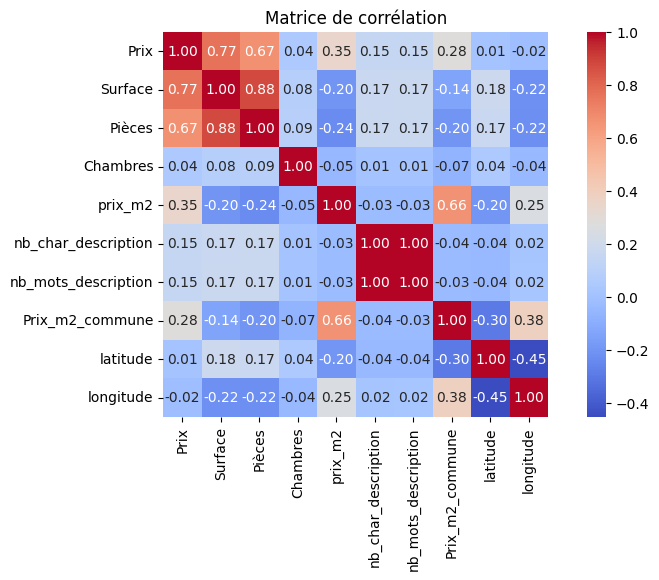

In [320]:
#matrice_corr=df_immo.corr()
matrice_corr = df_immo_enrichi.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 5))
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matrice de corrélation')
plt.show()

In [321]:
matrice_corr

,Prix,Surface,Pièces,Chambres,prix_m2,nb_char_description,nb_mots_description,Prix_m2_commune,latitude,longitude
Prix,1.000000,0.765912,0.668935,0.041368,0.345241,0.152353,0.152685,0.280546,0.011176,-0.021108
Surface,0.765912,1.000000,0.878775,0.081200,-0.199490,0.169420,0.172161,-0.136298,0.176970,-0.219831
Pièces,0.668935,0.878775,1.000000,0.086184,-0.237196,0.171263,0.173368,-0.198843,0.171121,-0.221663
Chambres,0.041368,0.081200,0.086184,1.000000,-0.045060,0.007646,0.008733,-0.067832,0.042242,-0.043207
prix_m2,0.345241,-0.199490,-0.237196,-0.045060,1.000000,-0.029967,-0.031125,0.664663,-0.196089,0.254095
nb_char_description,0.152353,0.169420,0.171263,0.007646,-0.029967,1.000000,0.996196,-0.035449,-0.039008,0.016377
nb_mots_description,0.152685,0.172161,0.173368,0.008733,-0.031125,0.996196,1.000000,-0.033184,-0.044051,0.020462
Prix_m2_commune,0.280546,-0.136298,-0.198843,-0.067832,0.664663,-0.035449,-0.033184,1.000000,-0.295806,0.383433
latitude,0.011176,0.176970,0.171121,0.042242,-0.196089,-0.039008,-0.044051,-0.295806,1.000000,-0.453183
longitude,-0.021108,-0.219831,-0.221663,-0.043207,0.254095,0.016377,0.020462,0.383433,-0.453183,1.000000


creer la variable code costal , regrouper la localisation à un niveau plus gros, voir si on peut avoir les commmunes voisines en cluster